# *Kenya Agricultural Market Insights and Forecasting System with Sentiment Analysis Project.*

## BUSINESS UNDERSTANDING
***

### Business Overview
Economic and livelihood concerns are critical issues in Kenya, impacting a substantial portion of the population. The agricultural sector, which is a major contributor to Kenya's economy, faces numerous challenges, including price volatility, market inefficiencies, and fluctuating public sentiment. These issues directly affect farmers' and traders' livelihoods, making it essential to develop data-driven solutions to address these concerns.


##### Stakeholders and Their Gains
1. Farmers (Small-Scale & Large-Scale)

🔹 Gains:

- Informed decisions on when and where to sell their produce for maximum profit.
- Insights into seasonal price trends to optimize crop production cycles.
- Awareness of public sentiment that may impact market demand.

2. Traders & Distributors (Wholesalers & Retailers)

🔹 Gains:

- Forecasting tools to plan optimal buying and selling times.
- Reduction in losses due to unexpected price drops.
- Better logistics planning by analyzing regional price variations.

3. Policymakers & Government Agencies (Ministry of Agriculture, KNBS, NDMA, etc.)

🔹 Gains:

- Data-backed policy formulation for price stabilization and market interventions.
- Early warning systems for food security.
- Understanding of market inefficiencies to improve agricultural policies.

4. Financial Institutions & Investors (Banks, Microfinance Institutions, Agribusiness Investors)

🔹 Gains:

- Credit risk assessment based on market trends and price stability.
- Informed decisions on investing in agriculture-related ventures.
- Development of agricultural insurance products based on price volatility analysis.

5. Consumers (General Public)

🔹 Gains:

- Awareness of expected price changes for household budgeting.
- More stable prices due to better market efficiency.
- Potential for lower food costs as market inefficiencies decrease.

6. Researchers & Data Scientists

🔹 Gains:

- A valuable dataset for further analysis and model improvements.
- Opportunities to develop new methodologies for price forecasting and sentiment analysis.
- Enhanced understanding of the relationship between social sentiment and economic trends.

### Problem Statement
Kenya's agricultural markets are characterized by significant price fluctuations across different regions and commodities. Factors such as seasonal variations, market demand, and public perception contribute to these fluctuations. For instance, maize prices can vary dramatically based on the time of year and the region, impacting farmers' decisions on when and where to sell their produce. Additionally, public sentiment, as expressed on social media platforms like Twitter, can influence market dynamics, further complicating the decision-making process for stakeholders.


### Main Objective
Develop a comprehensive system that leverages advanced data science techniques to analyze, forecast commodity prices and monitor market trends. This system aims to provide actionable insights to farmers, traders, and policymakers, enabling informed decisions and improving market efficiency and stability. Time series forecasting will be achieved through XGBoost or deep learning long short term memory neural network models(LSTM).  Sentiment analysis will play critical roles in  understanding public sentiment, thereby enhancing the overall accuracy and relevance of market predictions.


### Specific Objectives
1.	Assess Commodity Price Fluctuations

- Evaluate the price volatility of various commodities across different regions and time periods
- Identify the factors contributing to price fluctuations, such as seasonal variations, market demand e.t.c.

2.	Analyze Market Trends:
   
- Monitor market trends and patterns in commodity prices using historical data and advanced analytics.
- Develop predictive models to forecast future market trends and price movements.

3.	Incorporate Sentiment Analysis:

- Leverage sentiment analysis on social media data, particularly from Twitter, to assess public perception of agricultural markets. 


### Success Metrics

#### Forecasting Model Accuracy (Commodity Price Prediction)

| Metric | Target Range | Ideal Goal | Comments                                      |
|--------|--------------|------------|-----------------------------------------------|
| MAE    | 5–20 KES     | < 10 KES   | Lower values indicate better predictions.     |
| RMSE   | 10–30 KES    | < 15 KES   | Penalizes large errors more than MAE.         |
| R²     | 0.70–0.95    | > 0.85     | Higher values mean better model fit.          |

*Ideal Target:* MAE < 10 KES, RMSE < 15 KES, R² > 0.85  
(If commodity prices vary widely, normalize error metrics based on average price ranges.)

#### Sentiment Analysis Performance



Well compounded scores, reliably classifying sentiment (-1.0 to -0.05 as negative, -0.05 to 0.05 as neutral, 0.05 to 1.0 as positive).

## DATA UNDERSTANDING
***


The data used in this project originates from various sources, including historical commodity prices, geographical information, and sentiment data from social media platforms.

1. The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System [KAMIS](https://kamis.kilimo.go.ke/site/market?product=153&per_page=10), developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans and fish, ,is updated daily(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

2. Geographical Information:

-	Data on the location and characteristics of different agricultural markets in Kenya.
-	Includes information on regional variations in market conditions.

3. Sentiment Data from Social Media:
    
- Data collected from social media platforms like Twitter, capturing public sentiment related to agricultural markets.
- Includes information on public perception, opinions,  and discussions about commodity prices and market dynamics.




**Understanding rows and columns of our data**

In [1]:
#importing necessary libraries
import pandas as pd
import glob
import os
#from geopy.geocoders import Nominatim
import warnings
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns



# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path
from visualization import *
#from geolocate import geolocate_markets
#from scrape_kamis import scrape_kamis


# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# url = 'https://kamis.kilimo.go.ke/site/market?product=73&per_page=50000'
# scrape_kamis(url, 'Meat Beef.csv')


From the KAMIS website, were able to scrap data about different commodities as seperate excel files(CSV). The code below identifies all CSV files in the directory using glob, then iterates through each file, reading its contents -into individual Pandas DataFrames. These DataFrames are stored in a list and later concatenated into a single DataFrame (combined_df).


In [3]:
# Setting the directory containing our CSV files
csv_directory = ".\\Data\\Products"  

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22
...,...,...,...,...,...,...,...,...,...,...
288473,Beans (Yellow-Green),-,-,-,Gikomba,-,150.00/Kg,NaN,Nairobi,2021-05-24
288474,Beans (Yellow-Green),-,-,-,Eldama Ravine,100.00/Kg,120.00/Kg,300.0,Baringo,2021-05-24
288475,Beans (Yellow-Green),-,-,-,Kongowea,95.56/Kg,110.00/Kg,900.0,Mombasa,2021-05-24
288476,Beans (Yellow-Green),-,-,-,Makutano West Pokot,140.00/Kg,200.00/Kg,NaN,West-Pokot,2021-05-24


The combined dataframe encompanses different variety of foods over different markets in Kenya alongside their prices over a period of time. Their supply volume is also indicated. Combined, the dataframe spans 288478 rows and 10 columns. 

In [4]:
#checking the info of our dataset
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
dtypes: float64(1), object(9)
memory usage: 22.0+ MB


 9 columns contain text (object) datatype, 1 column (Supply Volume) contains numeric (float64) datatype. Supply Volume: Only 175,498 out of 288,478 rows have values. County: Almost complete, but 561 records have missing values. Other columns are fully populated, but some might contain placeholder values.

## DATA CLEANING
***

In data cleaning, we will ensure the dataset is accurate, relevant, consistent, complete, and uniform. This involves removing inaccuracies and outliers, filtering out irrelevant information that does not help in our analysis. We will also address inconsistent data formats, check naming conventions, ensuring a uniform structure across datasets, as well as identifying and filling null values to achieve completeness.
These steps are vital in maintaining data quality.

In [5]:
# Find latitudes and longitudes for markets
# geolocate_markets(combined_df)


The Geopy library was used to convert market names into coordinates while ensuring all locations are within Kenya. To optimize performance, it stores previously searched locations in a cache to avoid redundant API calls. The script iterates through the dataset, processes each market, and adds the coordinates to new columns in the DataFrame. Finally, it saves the updated data to a CSV file named "combined_with_coordinates.csv" for further analysis.

In [6]:
# Loading the new combined dataset with coordinates
products_df = pd.read_csv('.\\Data\\combined_with_coordinates.csv')

In [7]:
# Looking at the data's info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
dtypes: float64(3), object(9)
memory usage: 26.4+ MB


From the above, there are 12 rows and 288478 columns, with some columns having missing values. All columns are of object datatype except the longitude, latitude, and supply volume.

A commodity category mapping should be created to classify different commodities into broader food categories like vegetables and fruits, cereals and tubers, pulses and nuts, meat, fish and eggs,  milk and dairy. The mapping ensures consistency when analyzing or visualizing data. Using the .map() function, each commodity in the products_df DataFrame is assigned its respective category based on the dictionary. This step is crucial for easier aggregation, comparison, and trend analysis of different commodity groups in the dataset.

In [8]:
# Commodity categories mapping
commodity_category_mapping = {
    'Meat Beef': 'meat, fish and eggs',
    'Cabbages': 'vegetables and fruits',
    'Banana (Cooking)': 'vegetables and fruits',
    'Cowpea leaves (Kunde)': 'vegetables and fruits',
    'Cowpeas': 'pulses and nuts',
    'Dry Onions': 'vegetables and fruits',
    'Dry Maize': 'cereals and tubers',
    'Finger Millet': 'cereals and tubers',
    'Maize Flour': 'cereals and tubers',
    'Kales/Sukuma Wiki': 'vegetables and fruits',
    'Omena': 'meat, fish and eggs',
    'Red Irish potato': 'cereals and tubers',
    'Cow Milk(Processd)': 'milk and dairy',
    'Beans Red Haricot (Wairimu)': 'pulses and nuts',
    'Red Sorghum': 'cereals and tubers',
    'Rice': 'cereals and tubers',
    'Banana (Ripening)': 'vegetables and fruits',
    'Spinach': 'vegetables and fruits',
    'Wheat': 'cereals and tubers',
    'Beans (Yellow-Green)': 'pulses and nuts'
}
# Map commodities to categories
products_df['Category'] = products_df['Commodity'].map(commodity_category_mapping)

# Display the updated DataFrame
products_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


In [9]:
#inspecting the changes in the products_df
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
 12  Category        288478 non-null  object 
dtypes: float64(3), object(10)
memory usage: 28.6+ MB


From our inspection, the 'Sex' and 'Grade' column are not necessary for our assessment, and hence should be dropped

In [10]:
#Dropping the "Sex" and "Grade" columns in the products_df
products_df.drop(columns= ['Sex','Grade'], inplace=True,axis=1)

We are supposed to change the retail and wholesale prices into float values. However, each is attached to a unit of measurement, for example, maize measured in kilograms and milk measured in litres. The units will be seperated from the prices, added to another column, and the prices converted to float64 format. 

In [11]:
# Extract the numeric values and units
products_df['Unit'] = products_df['Retail'].str.extract(r'([a-zA-Z/-]+)')  # Extract unit
products_df['Retail'] = products_df['Retail'].str.extract(r'([\d.]+)').astype(float)  # Extract number

products_df['Wholesale'] = products_df['Wholesale'].str.extract(r'([\d.]+)').astype(float)  # Extract number

We created a markup percentage column that shows the percentage profits for different commodities in different markets

In [12]:
#Create a markup column and calculate the percentage
products_df['Markup %'] = ((products_df['Retail'] - products_df['Wholesale']) / products_df['Wholesale']) * 100

Next thing to be done is to change the 'Date' column into date-time format for easier analysis of trends.

In [13]:
# Changing Date column into date time format
products_df['Date'] = pd.to_datetime(products_df['Date'])
# Checking to ensure changes have reflected
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Commodity       288478 non-null  object        
 1   Classification  288478 non-null  object        
 2   Market          288478 non-null  object        
 3   Wholesale       250559 non-null  float64       
 4   Retail          211049 non-null  float64       
 5   Supply Volume   175498 non-null  float64       
 6   County          287917 non-null  object        
 7   Date            288478 non-null  datetime64[ns]
 8   latitude        199401 non-null  float64       
 9   longitude       199401 non-null  float64       
 10  Category        288478 non-null  object        
 11  Unit            288478 non-null  object        
 12  Markup %        173482 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 28.6+ MB


All datatypes have been changed successfully. 

### Dealing with Outliers

In [14]:
# Getting a  statistical summary of the numerical columns
products_df.describe()

,Wholesale,Retail,Supply Volume,latitude,longitude,Markup %
count,250559.000000,211049.000000,1.754980e+05,199401.000000,199401.000000,1.734820e+05
mean,76.154645,119.711842,7.809961e+03,-0.686573,36.237790,6.104690e+02
std,1055.093880,1069.669102,4.115118e+05,1.435692,1.794955,2.746895e+04
min,0.010000,0.010000,0.000000e+00,-4.622956,34.138607,-9.999831e+01
25%,25.000000,50.000000,5.000000e+02,-1.166037,34.763182,1.428571e+01
50%,45.000000,80.000000,1.500000e+03,-0.274214,35.834422,2.500000e+01
75%,80.000000,125.000000,4.300000e+03,0.129513,37.250000,5.000000e+01
max,480030.000000,411188.970000,1.000000e+08,3.709823,55.454533,5.999900e+06


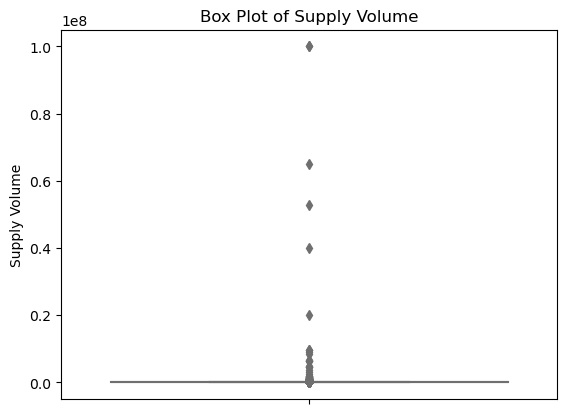

In [15]:
#Plotting a box plot to visualize the outlieirs in the Supply Volume column
sns.boxplot(y=products_df['Supply Volume'], color='skyblue').set(title='Box Plot of Supply Volume', ylabel='Supply Volume')
plt.show();

We plotted a box plot to visualize the distribution of the outliers in the supply volume column.From our findings the column had extreme outliers .

In [16]:
# finding the number of outliers in the supply volume column exceeding 100,000 in value
supply_count=products_df['Supply Volume'] > 1e+05
supply_count.value_counts()

False    287946
True        532
Name: Supply Volume, dtype: int64

In [17]:
# drop outliers
products_df.drop(products_df[products_df['Supply Volume'] > 1e+05].index, inplace=True)

We dropped the outliers exceeding 100,000 in value.

In [18]:
# confirming outliers have been dropped
supply_count1=products_df['Supply Volume'] > 1e+05
supply_count1.value_counts()

False    287946
Name: Supply Volume, dtype: int64

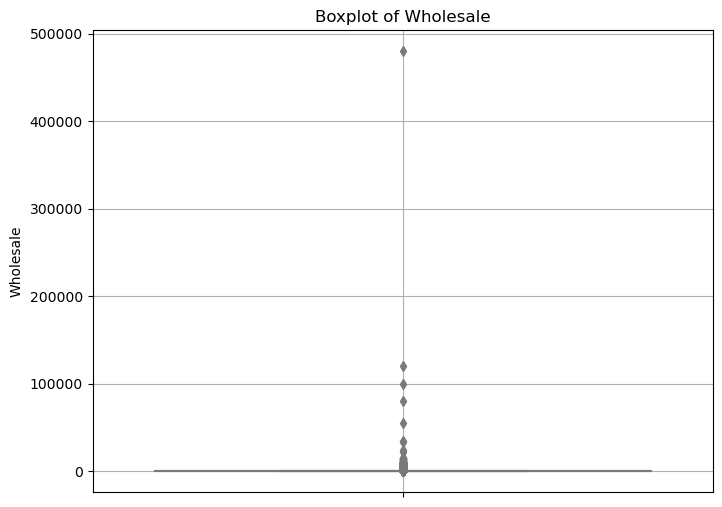

In [19]:
#Plotted a box plot to visualize the outliers in the Wholesale Column
plot_boxplot(products_df, "Wholesale")

Checked for outliers in the new wholesale column  found them to be extreme outliers.Some values had upto 480,000 per unit which is unrealistic.

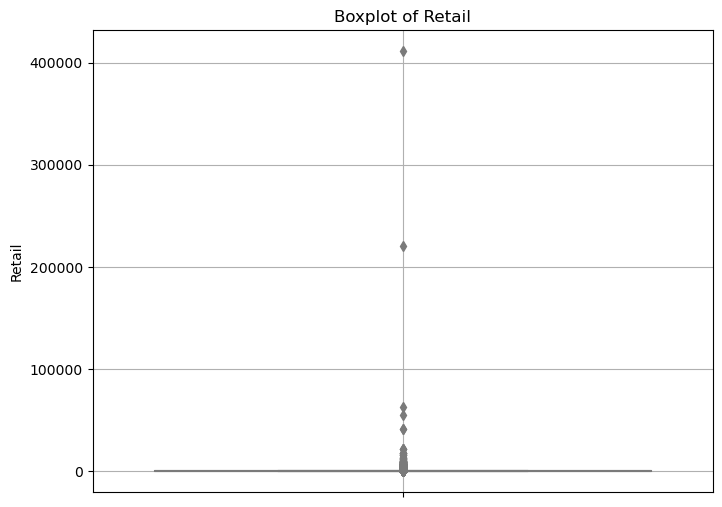

In [20]:
#Plotted a box plot to visualize the outliers in the Retail Column
plot_boxplot(products_df, "Retail")

Also checked for outliers in the retail column which were also  extreme.Some values were over 400,000 per unit which is also unrealistic and were also above the 75th Percentile.

In [21]:
#Dropping the extreme outliers in the Retail and Wholesale columns
products_df = products_df[(products_df['Wholesale'] <= 1000) & (products_df['Wholesale'] >= 10)]
products_df = products_df[(products_df['Retail'] <= 1000) & (products_df["Retail"] >= 10)].reset_index()

We Dropped records whose wholesale and retail prices are below ksh10 and  above ksh1000.

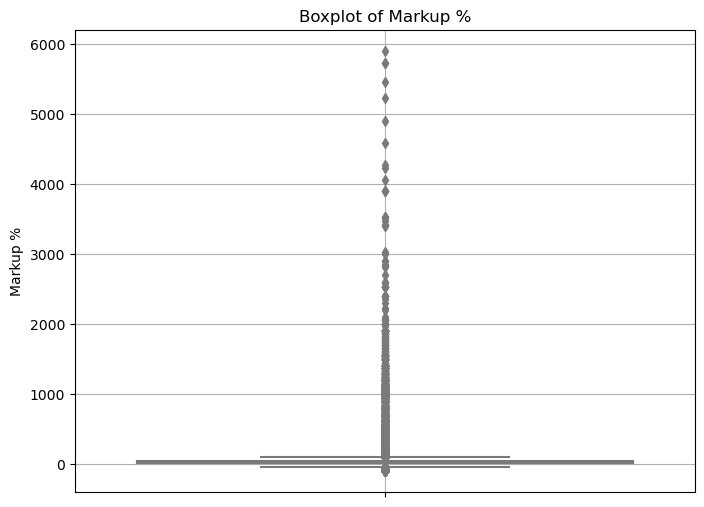

In [22]:
#Plotted a box plot to visualize the outliers in the Markup Column
plot_boxplot(products_df, "Markup %")


In [23]:
#Dropping rows that have a Markup % of less than -50 and greater than 1500
products_df = products_df[(products_df['Markup %'] >-50) & (products_df['Markup %'] <1500)]
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167441 entries, 0 to 168366
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           167441 non-null  int64         
 1   Commodity       167441 non-null  object        
 2   Classification  167441 non-null  object        
 3   Market          167441 non-null  object        
 4   Wholesale       167441 non-null  float64       
 5   Retail          167441 non-null  float64       
 6   Supply Volume   149411 non-null  float64       
 7   County          166959 non-null  object        
 8   Date            167441 non-null  datetime64[ns]
 9   latitude        124303 non-null  float64       
 10  longitude       124303 non-null  float64       
 11  Category        167441 non-null  object        
 12  Unit            167441 non-null  object        
 13  Markup %        167441 non-null  float64       
dtypes: datetime64[ns](1), float64(6), in

After dropping the outliers the remaining records are 167922 rows and 14 columns

### Handling Missing Values

In [24]:
#Checking for nulls
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 index              0.000000
Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume     10.767972
County             0.287863
Date               0.000000
latitude          25.763105
longitude         25.763105
Category           0.000000
Unit               0.000000
Markup %           0.000000
dtype: float64


Checked for any missing values in the Products dataset and found 4 columns had mising values. They include: Supply volume 10%, Latitude and Longitude at 25% each and County had 0.2%.

In [25]:
# Compute median values for each commodity
supply_medians = products_df.groupby('Commodity')[['Supply Volume']].median()

# Print median values before imputing
print(supply_medians)

# Function to impute missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row

# Apply imputation
products_df = products_df.apply(impute_supply_median, axis=1)


                             Supply Volume
Commodity                                 
Beans (Yellow-Green)                1080.0
Beans Red Haricot (Wairimu)          900.0
Cabbages                            4000.0
Cow Milk(Processd)                   852.0
Cowpea leaves (Kunde)                400.0
Cowpeas                              800.0
Dry Maize                           4800.0
Dry Onions                          2500.0
Finger Millet                        750.0
Kales/Sukuma Wiki                   1050.0
Maize Flour                         3240.0
Meat Beef                           1200.0
Omena                               1000.0
Red Irish potato                    3800.0
Red Sorghum                          900.0
Rice                                2200.0
Spinach                              500.0
Wheat                                900.0


In [26]:
# print the new null percentages for each column
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 index              0.000000
Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume      0.000000
County             0.287863
Date               0.000000
latitude          25.763105
longitude         25.763105
Category           0.000000
Unit               0.000000
Markup %           0.000000
dtype: float64


Checked for missing values again and confimed that the supply volume column now had none. The remaining column with nulls are Latitude and Longitude at 25% each and County had 0.2%.

Longitude and Latitude columns contain geographical data and there is no way to impute those missing values. County column has 0.2% nulls which is a neglible amount.

We decided to drop all the remaining observations with nulls since there was no risk of lossing a lot of data.

In [27]:
#drop remaining records with nulls
products_df=products_df.dropna(axis=0).reset_index()

In [28]:
# check for missing percentages again
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

products_df.info()

percentage of nulls 
 level_0           0.0
index             0.0
Commodity         0.0
Classification    0.0
Market            0.0
Wholesale         0.0
Retail            0.0
Supply Volume     0.0
County            0.0
Date              0.0
latitude          0.0
longitude         0.0
Category          0.0
Unit              0.0
Markup %          0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124303 entries, 0 to 124302
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   level_0         124303 non-null  int64         
 1   index           124303 non-null  int64         
 2   Commodity       124303 non-null  object        
 3   Classification  124303 non-null  object        
 4   Market          124303 non-null  object        
 5   Wholesale       124303 non-null  float64       
 6   Retail          124303 non-null  float64       
 7   Supply Volume   124303 non-null  float64

The dataframe now has no missing values and contains 124303 rows with 14 columns.

In [29]:
#Check for duplicates
products_df.duplicated().value_counts()

False    124303
dtype: int64

There are no duplicates in the DataFrame. 

## EXPLORATORY DATA ANALYSIS
***

#### **Univariate Analysis**

**Analysis of distribution of supply volume**

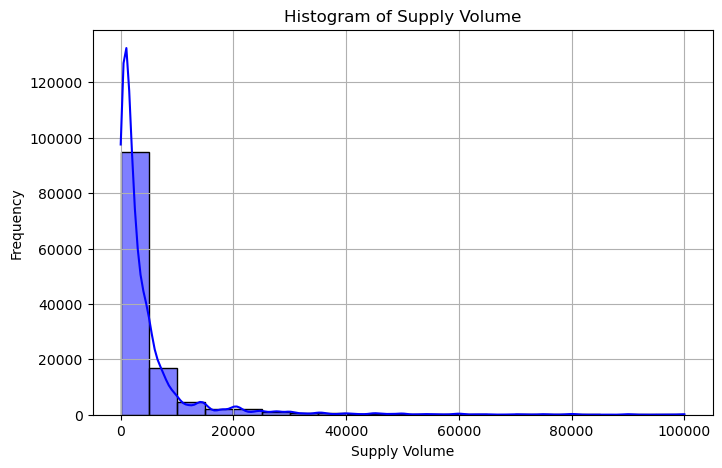

In [30]:
# Plotting histogram of supply volume to check for outliers
from scripts.visualization import plot_histogram

plot_histogram(products_df, 'Supply Volume')


Analysis of the Supply Volume column shows that it is not normally distributed. It is skewed to the left. The histogram's positive skewness indicates that most commodities have low supply volumes, with only a few having high volumes. This distribution suggests that high supply volumes might indicate high-demand commodities, while low volumes could point to niche or specialized products. Consequently, high-volume commodities may experience stable prices, whereas low-volume commodities might have higher or more volatile prices.

**Distribution of Dates in our dataset**


Let's look at the distribution of Dates in the dataset.

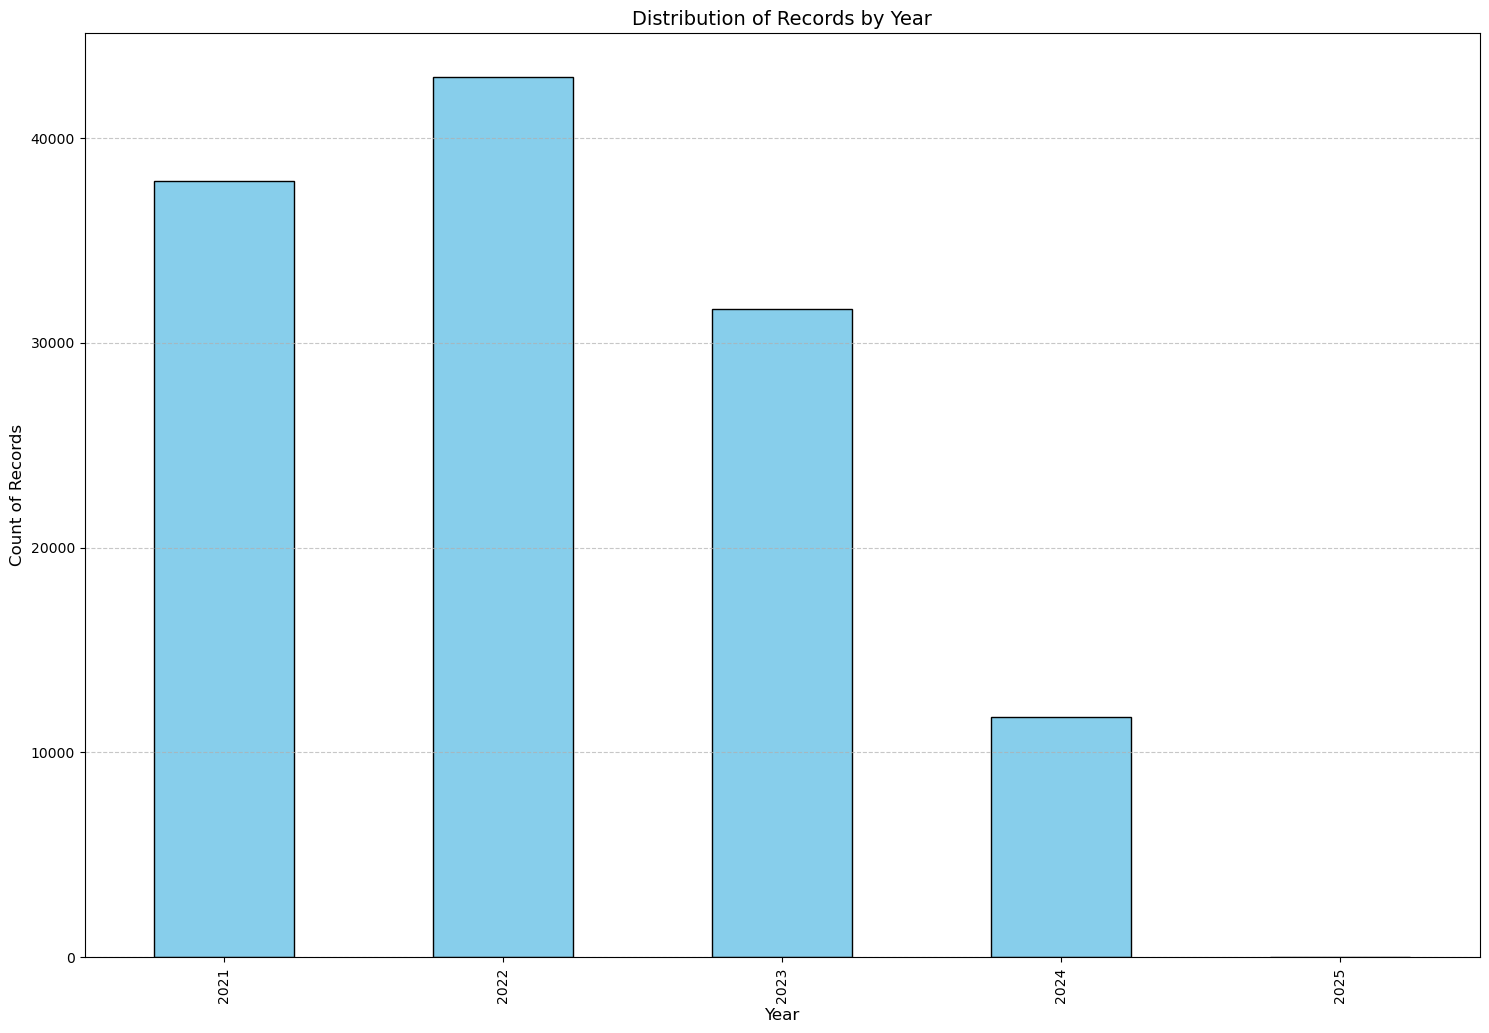

In [31]:
# Extract month-year period from the Date column
df = products_df.copy()
df['YearMonth'] = products_df['Date'].dt.to_period('Y')

# Count the number of records for each month-year
month_year_counts = df['YearMonth'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(18, 12))
month_year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Records by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bulk of the data collected is post-Covid from 2021 to as recently as 2025. This makes it very relevant for this study and generating modern day actionable insights.

**Frequency of records per commodity**


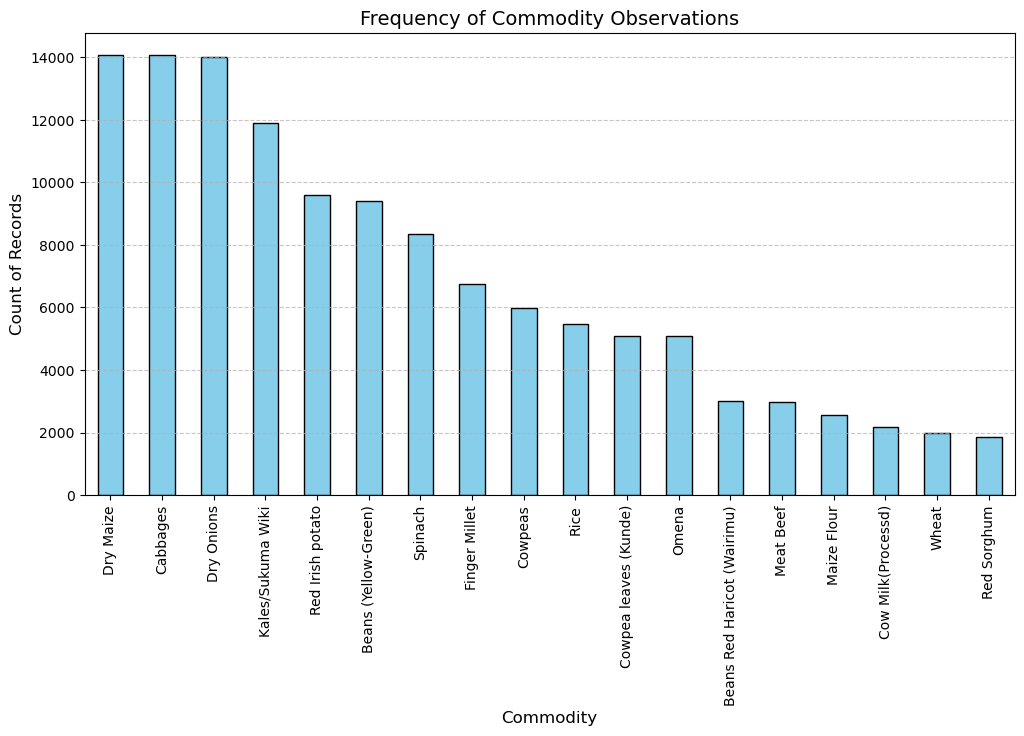

In [32]:
import matplotlib.pyplot as plt

#Bar Chart of Commodity Counts
commodity_counts = products_df['Commodity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

commodity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Commodity Observations", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dry maize are are the most populous commodity in the dataset closely followed cabbages and Dry Onions each with over 14,000 records. This might suggest they are either more frequently traded or consumed as these are major staple foods across many houselholds in Kenya. Processed Cow Milk, Wheat and  Red Sorghum variety are the least populous with all having just below 2500 records.  This could suggest factors like lower production, less widespread consumption, or less frequent recording in the data.

#### **Bivariate Analysis**

**The average retail prices of commodities per month**

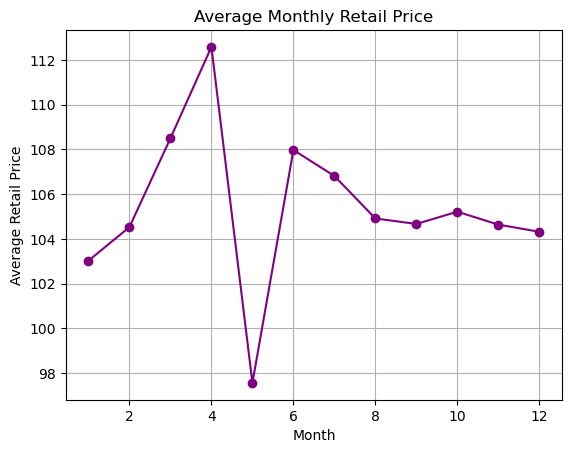

In [33]:
# Seasonal Trends
products_df['Month'] = products_df['Date'].dt.month
monthly_trends = products_df.groupby('Month')['Retail'].mean()
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Average Monthly Retail Price")
plt.xlabel("Month")
plt.ylabel("Average Retail Price")
plt.grid(True)
plt.show()

- January to April coincides with preparation for Planting Season. The primary planting season in Kenya typically commences in [March](https://oneacrefund.org/articles/behind-scenes-seed-and-fertilizer-procurement). To prepare, farmers may retain a portion of their produce for seeds, further limiting the amount available in the market and contributing to price increases. 
- The April to June period aligns with the beginning of the [long rains](https://www.nathab.com/know-before-you-go/african-safaris/east-africa/weather-climate/kenya/) season, leading to the harvest of certain crops. This influx can increase supply for specific commodities, potentially lowering their prices. 
- Between June and December, Kenya experiences a notable decline in food prices, influenced by increased Agricultural Production. [Favorable weather conditions](https://www.nathab.com/know-before-you-go/african-safaris/east-africa/weather-climate/kenya/), including adequate rainfall, leads to improved harvests. This boost in agricultural output increased the supply of staple foods, contributing to price reductions.

**Top 20 markets with the biggest supply volumes**


Top 20 Markets by Total Supply Volume:
 Market
Bondo                   32878091.00
Eldoret Main            28558314.00
Kutus                   26168605.21
Kagio                   20984668.00
Aram                    20108919.87
Daraja Mbili            17998753.00
Kongowea                16657903.00
Kakuma Modern Market    14873950.00
Diani Market            13716921.60
Akala                   11259752.00
Chuka                   10815664.00
Ngong market            10683664.00
Kapkwen                  9860424.00
Rongo                    9648877.97
Maua                     9498000.00
Keroka                   9316667.55
Kiritiri                 9219056.00
Webuye town              8863220.00
Marigat                  8408931.00
Soko mpya                8115530.90
Name: Supply Volume, dtype: float64


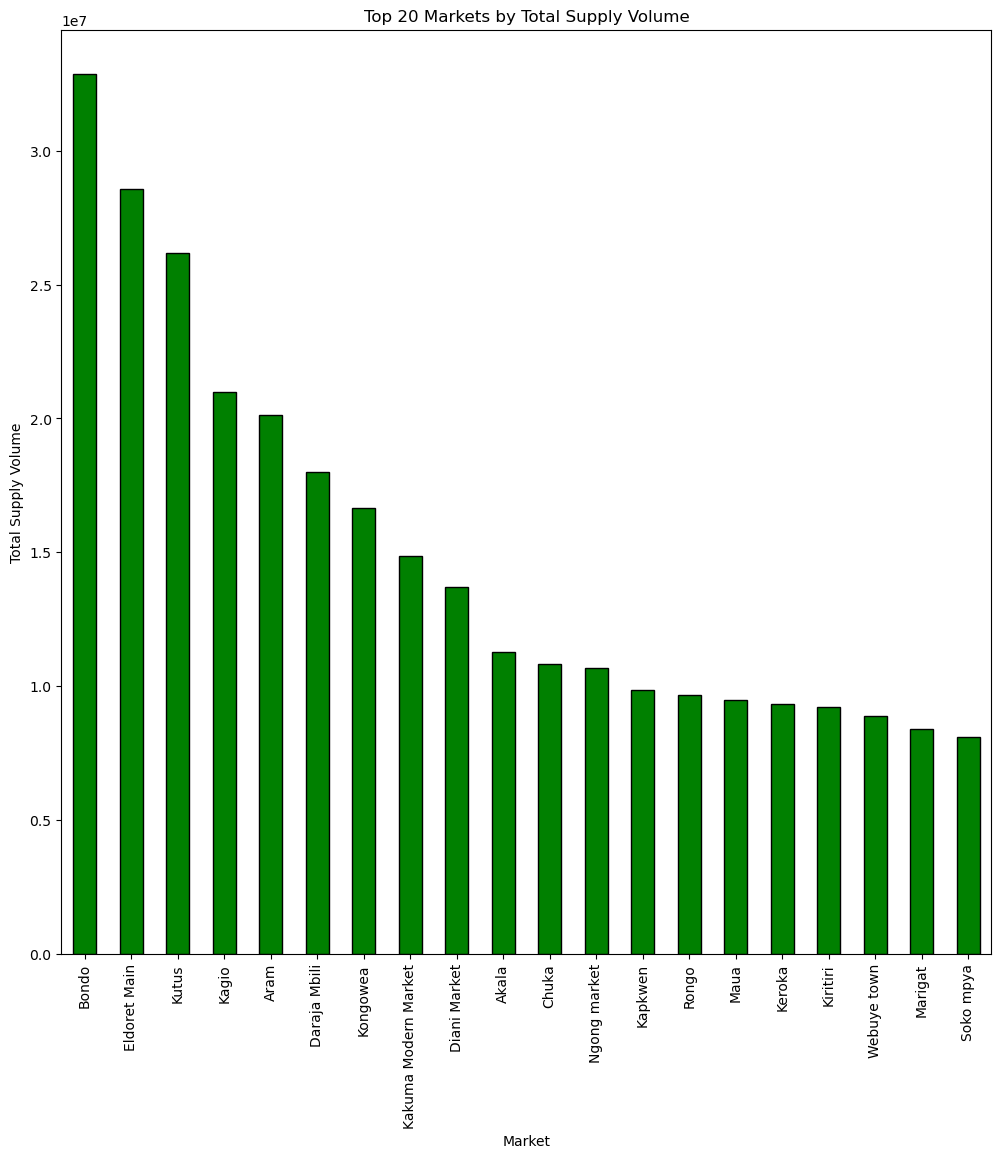

In [34]:
# Plotting top 20 markets by total supply volume
top_markets_by_supply = products_df.groupby('Market')['Supply Volume'].sum().nlargest(20)
print("\nTop 20 Markets by Total Supply Volume:\n", top_markets_by_supply)
top_markets_by_supply.plot(kind='bar', color='green', edgecolor='black', figsize=(12, 12))
plt.title("Top 20 Markets by Total Supply Volume")
plt.xlabel("Market")
plt.ylabel("Total Supply Volume")
plt.show()

This graph depicts the top 20 Kenyan markets by total supply volume. Bondo Market significantly surpasses all others, indicating its dominance as a major distribution hub.  A wide range of supply volumes exists among the remaining top 20, reflecting varying market sizes and demand. The graph suggests a concentration of supply within these key markets.
Geographic distribution of these markets (e.g., Bondo, Kutus, ) can allow for potential regional economic analysis when combined with location data.

**Comparison of the retail prices of different commodity categories**


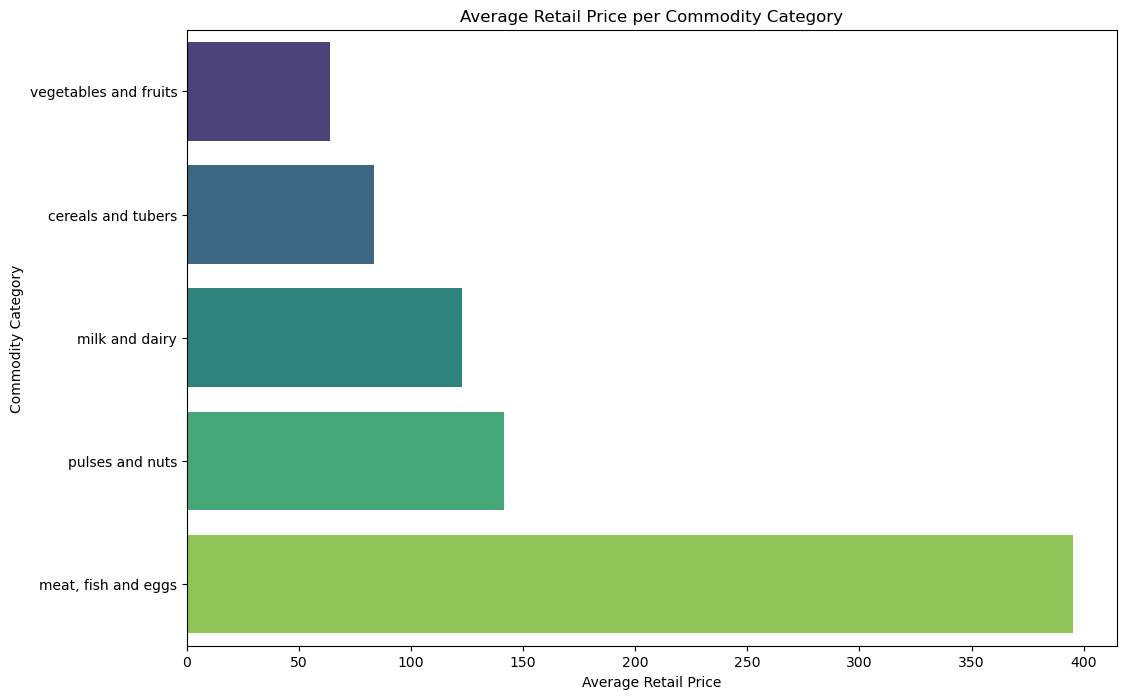

In [35]:
# Calculate the average retail price per category
category_avg_price = products_df.groupby('Category')['Retail'].mean().sort_values()

# Plot the average retail price per category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_avg_price.values, y=category_avg_price.index, palette='viridis')
plt.title('Average Retail Price per Commodity Category')
plt.xlabel('Average Retail Price')
plt.ylabel('Commodity Category')
plt.show()

The bar graph represents the Average price details per category of the commodities. Categories like meat, fish and eggs are generally expensive considering they have the highest average retail price. Staples like maize, beans, or vegetables tend to be more affordable. The categories appear to have a gradual increase in price, with a clear disparity between the highest and lowest-priced commodities. The pricing difference could be influenced by supply chain costs, seasonal availability or import dependencies.

**The supply volume of each commodity**


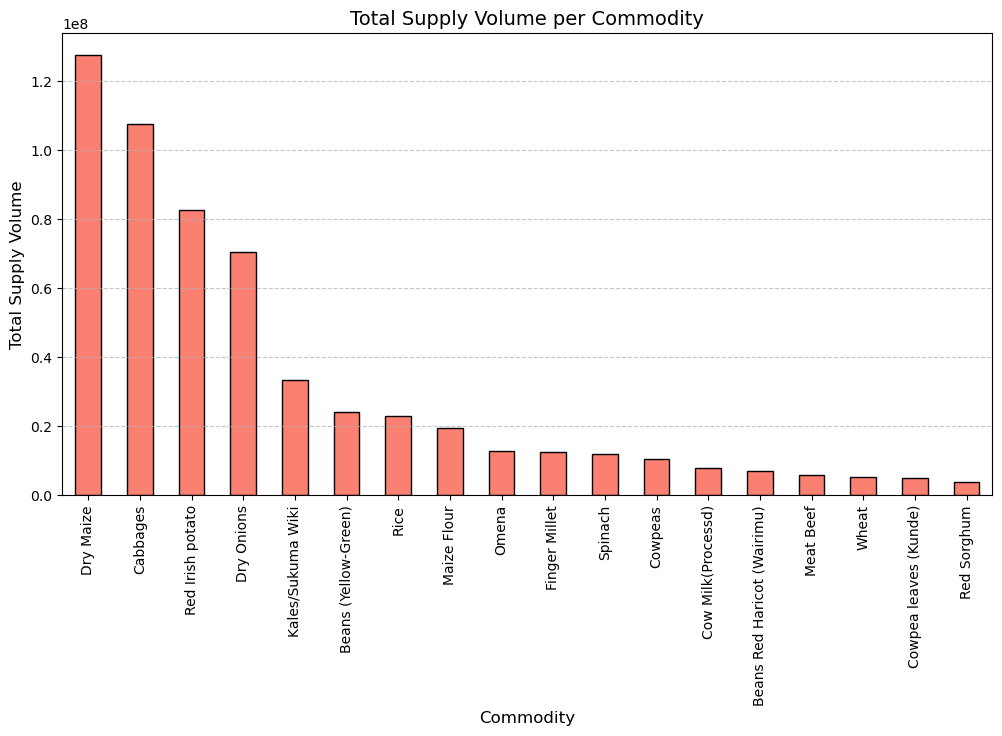

In [36]:
# Bar Chart of Total Supply Volume per Commodity
commodity_supply = products_df.groupby('Commodity')['Supply Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
commodity_supply.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Total Supply Volume per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Total Supply Volume", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The graph depicts the total supply volume of various agricultural commodities. It highlights the varying levels of **production and availability** for different agricultural products, with Dry Maize clearly dominating the supply, followed by Cabbages and Red Irish Potatoes. Commodities such as Wheat, Cowpea leaves,and Meat Beef, among others, have notably lower supply volumes. This disparity in supply volume likely has implications for market prices, food security, and agricultural planning within the region represented.

**Analysis of average retail prices from 2021 to date**


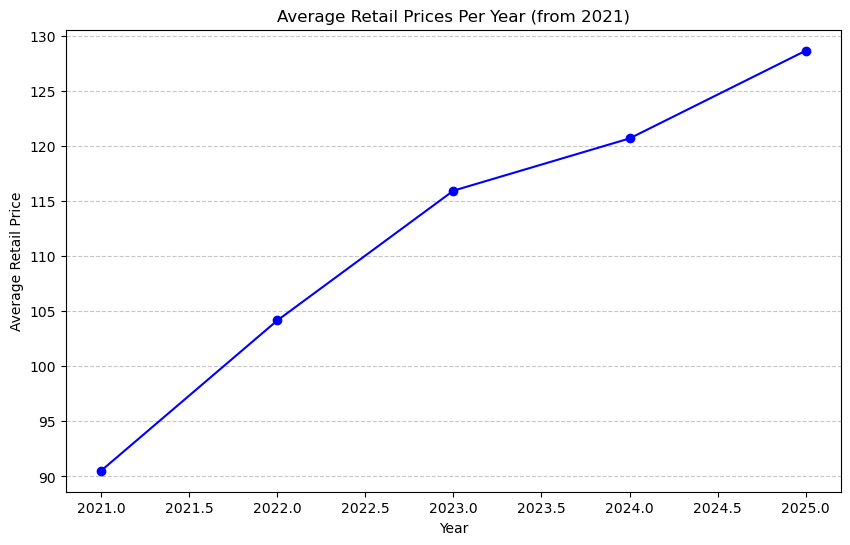

In [37]:

# Filter the data from 2021 onwards
df_filtered_2021 = products_df[products_df['Date'].dt.year >= 2021]

# Calculate the average retail prices per year
average_prices_per_year = df_filtered_2021.groupby(
	df_filtered_2021['Date'].dt.year)['Retail'].mean()
	

# Plot the average prices per year
plt.figure(figsize=(10, 6))
average_prices_per_year.plot(kind='line', color='blue', marker='o')
plt.title("Average Retail Prices Per Year (from 2021)")
plt.xlabel("Year")
plt.ylabel("Average Retail Price")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Kenyan food prices rose steadily from 2021 to 2025.  A sharp jump in 2022 likely stemmed from the [Russia-Ukraine conflict's impact on global food and energy markets](https://doi.org/10.1111/1467-8268.12728). Continued increases reflect lingering conflict effects, [climate change](https://dicf.unepgrid.ch/kenya/climate-change), [global economic factors](https://www.carbonbrief.org/experts-what-is-causing-food-prices-to-spike-around-the-world/), and other internal factors, underscoring Kenya's vulnerability to international price shocks.

#### **Multivariate Analysis**

**Relationship between supply volume of commodities and their retail prices**


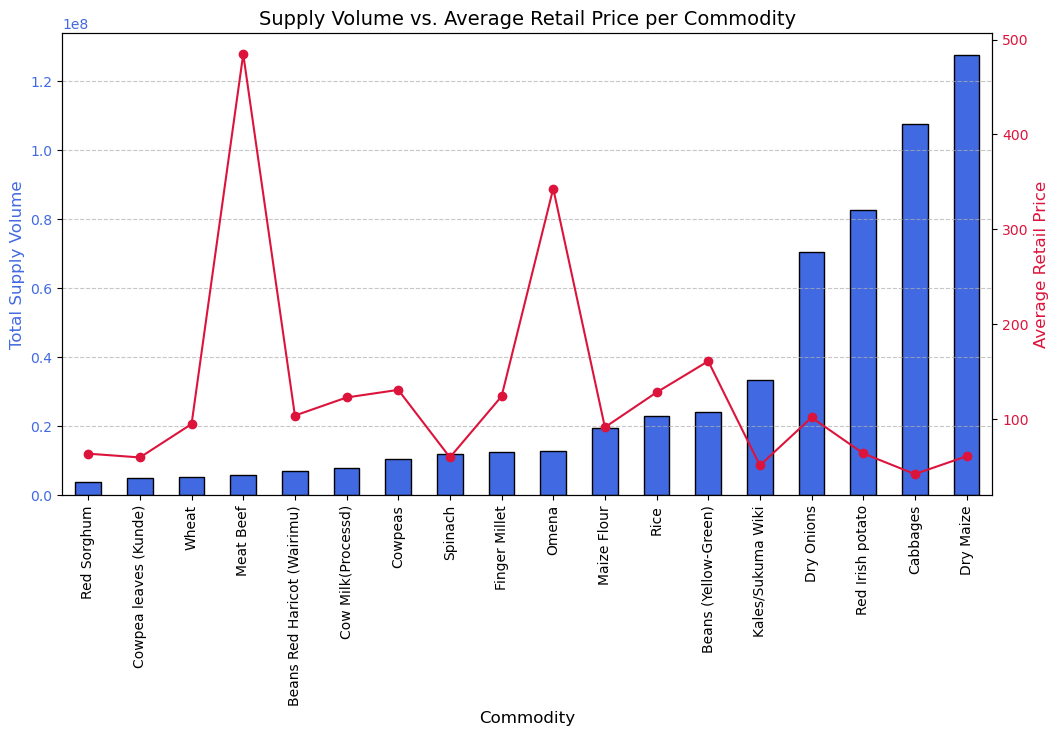

In [38]:
# Aggregate supply volume and average retail price per commodity
commodity_stats = products_df.groupby('Commodity').agg({'Supply Volume': 'sum', 'Retail': 'mean'}).sort_values('Supply Volume')

# Plot supply volume as bars and retail price as a line
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for supply volume
commodity_stats['Supply Volume'].plot(kind='bar', color='royalblue', edgecolor='black', ax=ax1)
ax1.set_ylabel("Total Supply Volume", fontsize=12, color='royalblue')
ax1.set_xlabel("Commodity", fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticklabels(commodity_stats.index, rotation=90)

# Line plot for average retail price
ax2 = ax1.twinx()
commodity_stats['Retail'].plot(kind='line', color='crimson', marker='o', ax=ax2)
ax2.set_ylabel("Average Retail Price", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Titles and grid
plt.title("Supply Volume vs. Average Retail Price per Commodity", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The graph shows an inverse relationship between supply volume and retail price. When supply is low, prices spike sharply, as seen in two major peaks. This likely means there were shortages at those points, driving prices higher. But as supply increases, prices start to stabilize and even decline. The pattern suggests that when more of a product is available, the market naturally corrects itself, making things more affordable. It’s a classic case of how availability influences cost.

**The average markup of each commodity**


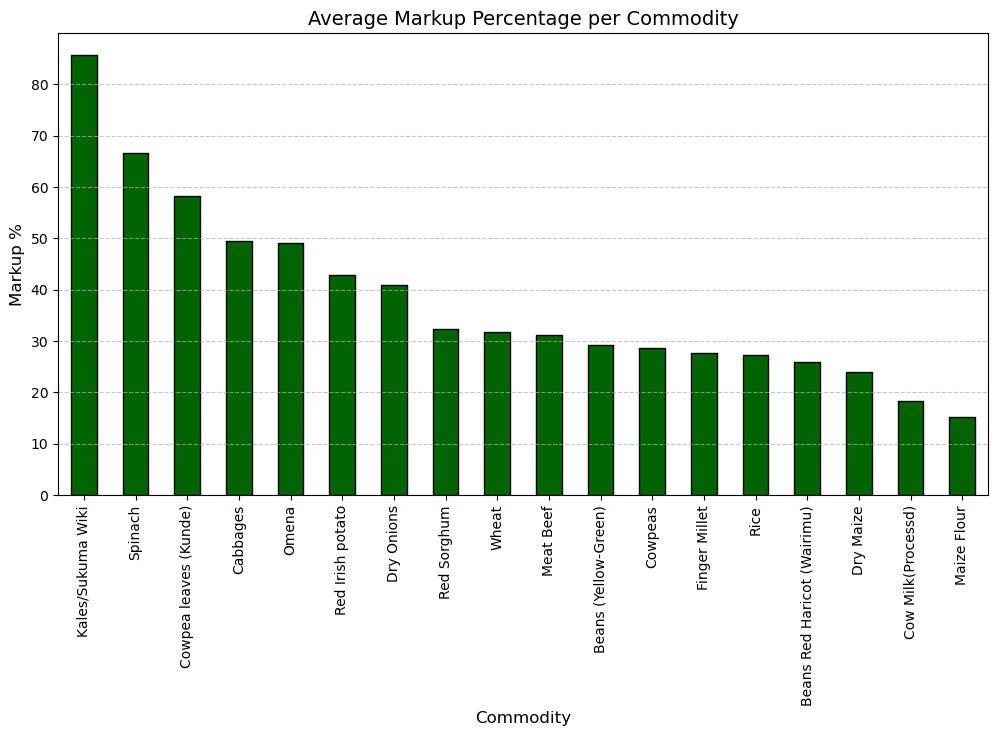

In [39]:
# Aggregate average markup percentage per commodity
commodity_markup = products_df.groupby('Commodity')['Markup %'].mean().sort_values(ascending=False)

# Plot markup percentage
plt.figure(figsize=(12, 6))
commodity_markup.plot(kind='bar', color='darkgreen', edgecolor='black')

plt.title("Average Markup Percentage per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Markup %", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Bars extending higher on the graph indicate a greater markup percentage for the corresponding commodity. A high markup suggests either a profitable market or potentially inflated prices which according to the graph Kales/Sukuma Wiki variety, has a greater markup percentage compared to the rest of the commodities, while a low markup indicates a smaller difference between cost and selling price as seen in maize flour.

**Trend of commodity prices over time**


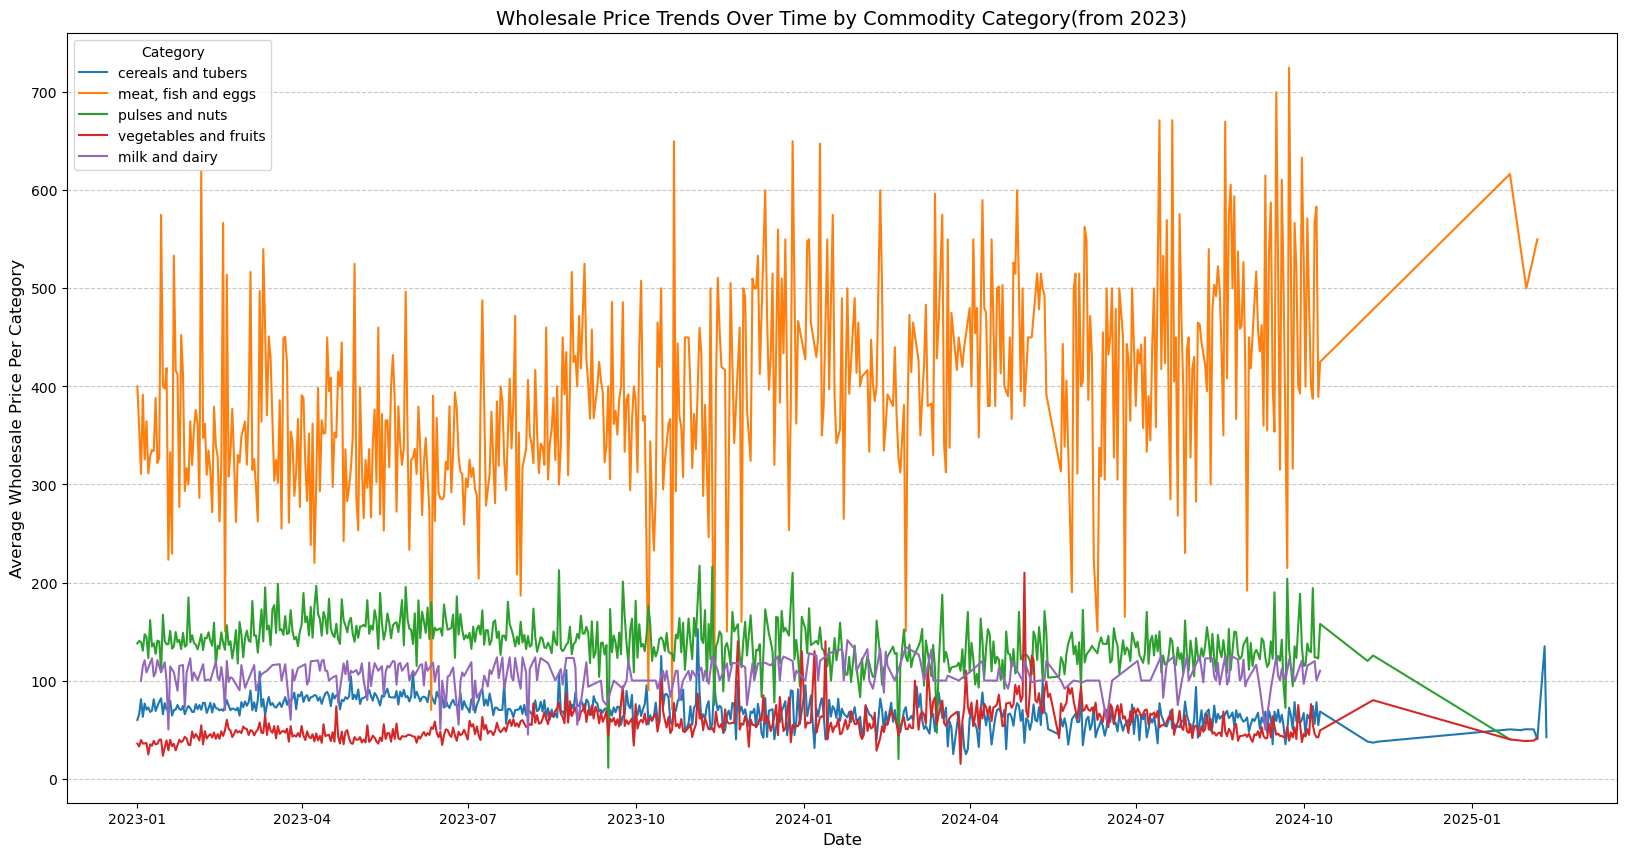

In [40]:
# Group data by category and date, then calculate the average wholesale price per category over time
df_category_trends = products_df.groupby(['Date', 'Category'])['Wholesale'].mean().reset_index()

# Filter data for records from 2023 onwards
df_category_trends = df_category_trends[df_category_trends['Date'].dt.year >= 2023]

# Plot price trends over time for different categories
plt.figure(figsize=(20, 10))
for category in df_category_trends['Category'].unique():
    subset = df_category_trends[df_category_trends['Category'] == category]
    plt.plot(subset['Date'], subset['Wholesale'], linestyle='-', label=category)

plt.title("Wholesale Price Trends Over Time by Commodity Category(from 2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Wholesale Price Per Category", fontsize=12)
plt.legend(title="Category",loc='upper left')  # Legend outside for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This plot shows the price stability of different commodity categories for the past 2 years.

The "meat, fish, and eggs" category (orange line) consistently has the highest wholesale prices  fluctuating between 300 and 700.
The prices exhibit high volatility with noticeable price spikes, suggesting seasonal effects, supply shortages, or market disruptions.

Categories like"Pulses and Nuts" (Green) has moderate prices, mostly between 150 and 250, but shows occasional spikes.

"Milk and Dairy" (Purple) and "Cereals and Tubers" (Blue) are in the same lower range (50-150) and show some fluctuations but remain more stable over time.

Some categories experience extreme short-term price increases, e.g., "meat, fish, and eggs" around October 2023 From domain research, these spikes can be attributed to the following factors:

In October 2023, Kenya experienced a significant increase in egg prices. This surge was primarily due to escalating transportation and production costs and increased cost of poultry feed largely driven by rising fuel prices, as reported in this [article by Food Business Africa](https://www.foodbusinessafrica.com/egg-prices-on-the-rise-in-kenya-due-to-economic-challenges/?utm_source=).

The price spikes observed  were influenced by a combination of increased production and transportation costs, supply chain disruptions, and government policy interventions aimed at stabilizing the sectors.

**Average prices of different commodities per county**


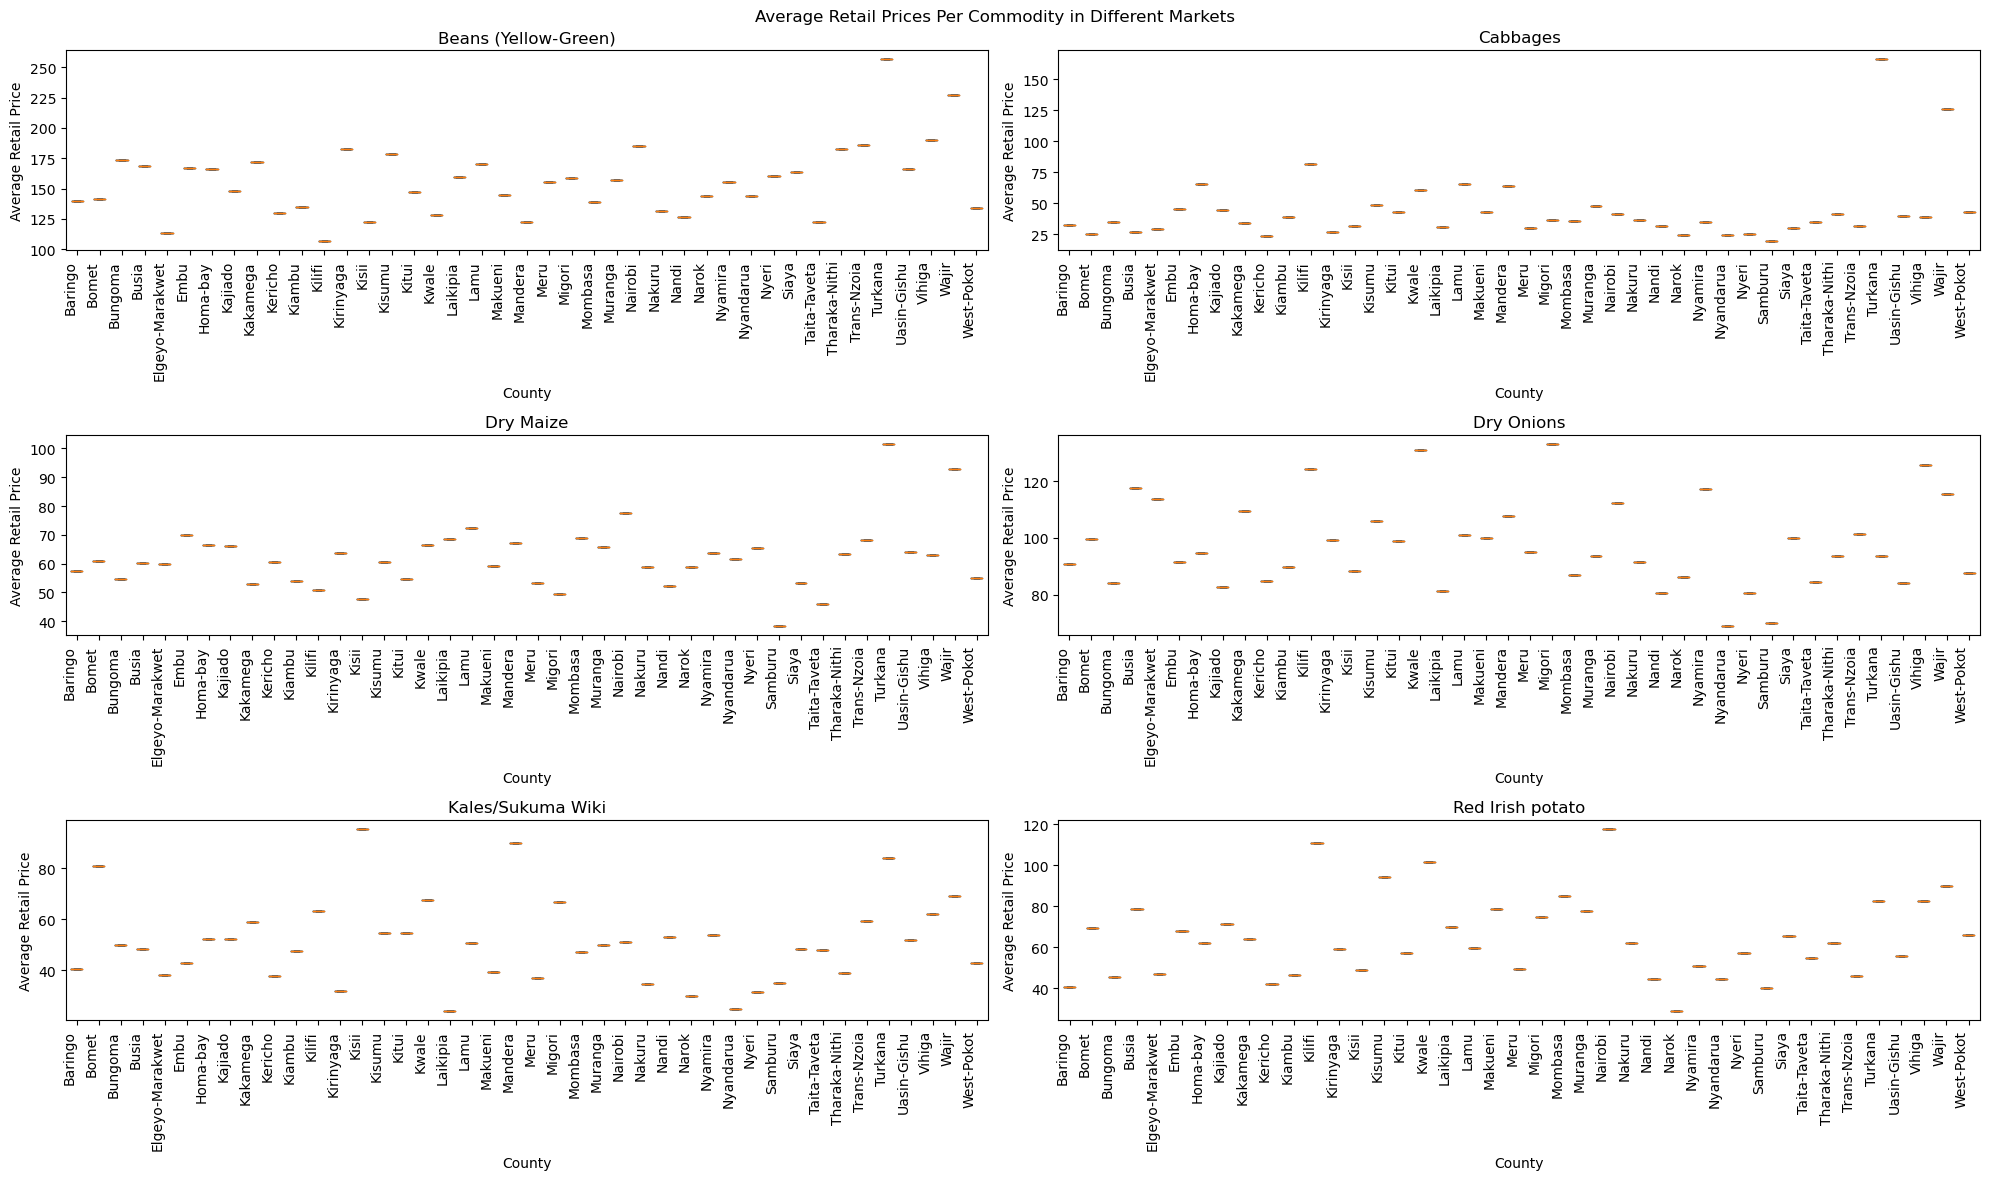

In [41]:

# Calculate average retail prices per commodity and market
df_avg = products_df.groupby(['Commodity', 'County'], as_index=False)['Retail'].mean()

# Limit to top 6 most frequent commodities for better visualization
top_commodities = df_avg['Commodity'].value_counts().index[:6]
df_avg = df_avg[df_avg['Commodity'].isin(top_commodities)]

# Create a figure
plt.figure(figsize=(20, 12))  # Adjust the figure width for better spacing
plt.suptitle("Average Retail Prices Per Commodity in Different Markets")

# Get unique commodities for subplots
commodities = df_avg['Commodity'].unique()

# Number of subplots (one per commodity)
n_cols = 2  # Set the number of columns for subplot layout
n_rows = len(commodities) // n_cols + (1 if len(commodities) % n_cols != 0 else 0)

# Loop through the commodities to create each subplot
for i, commodity in enumerate(commodities):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Filter the data for the current commodity
    df_commodity = df_avg[df_avg['Commodity'] == commodity]
    
    # Create the boxplot for the commodity
    ax.boxplot([df_commodity[df_commodity['County'] == county]['Retail'] for county in df_commodity['County'].unique()])
    
    # Set the labels and title
    ax.set_xticklabels(df_commodity['County'].unique(), rotation=90, ha='right')
    ax.set_xlabel('County')
    ax.set_ylabel('Average Retail Price')
    ax.set_title(commodity)

# Adjust spacing for readability
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


**Cabbages:** Turkana, West Pokot, and Marsabit have the highest cabbage prices. These counties are remote, arid/semi-arid, and distant from major agricultural centers, leading to high transportation costs and likely limited local production due to harsh environmental conditions.

**Dry Maize:** Turkana, Laikipia, and Lamu show high maize prices.  Turkana and Lamu face challenges similar to those mentioned for cabbages (remoteness, aridity), limiting local maize production. Laikipia, while not as remote as Turkana, may have limited suitable land for maize cultivation and also faces challenges with water availability, driving up prices due to reliance on external supply.

**Dry Onions:** Nakuru, Migori, and Busia have high onion prices. Onions are perishable and require proper storage.  These counties may lack adequate storage facilities, leading to losses and higher prices to compensate.  Additionally, transportation costs and local supply/demand dynamics could be contributing factors.

**Kales/Sukuma Wiki:** Bomet, Kisii, Meru, and Turkana have high prices.  While kales/sukuma wiki are often locally grown, these specific counties may have experienced lower than usual local production due to seasonal variations, pest infestations, or other localized agricultural challenges. Turkana's remoteness likely adds to the cost.

**Irish Potato:** Kilifi, Nairobi, Kisumu, and Kwale show high potato prices.  Potatoes, like onions, require proper storage, and these counties might face similar storage and transportation challenges. Nairobi, as a major urban center, likely has high demand, which could also contribute to higher prices.

**Beans:** Turkana and Marsabit have high bean prices. These remote and arid counties likely face significant challenges in producing enough beans locally, leading to reliance on supplies from other regions, which drives up prices due to transportation costs.

**Rice:** Uasin Gishu, Kirinyaga, and West Pokot have high rice prices.  While some of these counties might be known for rice production, they may be experiencing local shortages due to drought, reduced acreage under cultivation, or high demand relative to supply.  West Pokot's remote location likely adds to the cost.

## SENTIMENT ANALYSIS
***

In the sentiment analysis section, we aim to analyze the public sentiment regarding the prices and availability of various commodities in Kenya. This involves collecting and processing textual data, in this case social media posts, to determine the overall sentiment (positive, negative, or neutral) expressed by individuals. By applying natural language processing (NLP) techniques, we can extract insights into how people feel about different commodities, identify trends, and correlate these sentiments with actual market data. This analysis can help us understand the impact of public perception on commodity prices and supply, and provide valuable information for stakeholders in the agricultural sector.

**The VADER library**

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool specifically tailored to sentiments expressed in social media. It is simple to use and provides a good balance between computational efficiency and accuracy. VADER is particularly effective for analyzing short, informal texts like tweets and comments, making it ideal for our analysis. Additionally, VADER is capable of handling negations, slang, and emojis, which are common in social media posts, further enhancing its suitability for this task.

In [42]:
# # Set the directory containing your CSV files
# tweets_csv_directory = ".\\scripts\\Twitter"  # Replace with the path to your directory

# # Use glob to match all CSV files in the directory
# tweet_csv_files = glob.glob(os.path.join(tweets_csv_directory, '*.csv'))

# # Define the expected column names (update these with your actual column names)
# column_names = ['column1', 'column2', 'column3', 'column4', "column5"]  # Replace with actual column names

# # Initialize an empty list to hold DataFrames
# tweets_data_frames = []

# # Iterate over the list of CSV files
# for file in tweet_csv_files:
#     # Read each CSV file into a DataFrame, explicitly passing column names
#     try:
#         tweet_df = pd.read_csv(file, header=None, names=column_names)  # Read without header and assign column names
#         tweets_data_frames.append(tweet_df)
#     except Exception as e:
#         print(f"Error reading {file}: {e}")

# # Concatenate all DataFrames in the list into a single DataFrame
# tweets_combined_df = pd.concat(tweets_data_frames, ignore_index=True)

# # Check the combined DataFrame for any unexpected columns
# print(tweets_combined_df.isna().value_counts())

# # Write the cleaned DataFrame to a CSV file
# # output_file = "combined_tweets.csv"
# # tweets_combined_df.to_csv(output_file, index=False)


In [43]:
# Loading the combined tweets dataset
combined_tweets = pd.read_csv('combined_tweets.csv')
combined_tweets.head()


,column1,column2,column3,column4,column5
0,Username,Text,Created At,Retweets,Likes
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12


In [44]:
# Adding appropriate header names to the dataframe
if 'combined_tweets.csv' not in os.listdir():
    combined_tweets = pd.read_csv('combined_tweets.csv')
    combined_tweets.columns = ['Username', 'Text', 'Created At', 'Retweets', 'Likes']
    combined_tweets.columns = combined_tweets.iloc[0]
    combined_tweets = combined_tweets[1:]
    combined_tweets.to_csv('combined_tweets.csv', index=False)
else:
    combined_tweets = pd.read_csv('combined_tweets.csv')
combined_tweets.columns = ['Username', 'Text', 'Created At', 'Retweets', 'Likes']
combined_tweets.columns = combined_tweets.iloc[0]
combined_tweets = combined_tweets[1:]
combined_tweets.head()

,Username,Text,Created At,Retweets,Likes
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12
5,Kenyans.co.ke,We want to better the economy of Kenya by help...,Tue Sep 03 14:04:36 +0000 2024,17,90


**Applying VADER**

The VADER (Valence Aware Dictionary and sEntiment Reasoner) model will analyze the `Text` column in the following steps:

1. **Text Preprocessing**: The text data in the `Text` column will be preprocessed to remove any unnecessary characters, such as URLs, mentions, and special characters.

2. **Sentiment Analysis**: The VADER model will be applied to each text entry in the `Text` column. VADER uses a combination of a sentiment lexicon and grammatical rules to assign sentiment scores to the text. It evaluates the text for positive, negative, and neutral sentiment components.

3. **Sentiment Score Calculation**: For each text entry, VADER will calculate a compound sentiment score, which is a normalized, weighted composite score that ranges from -1 (most negative) to +1 (most positive).

4. **Assigning Sentiment Scores**: The calculated sentiment scores will be assigned to a new column in the DataFrame, named `Sentiment`.



Our search words for tweets utilized the following search phrases:

- Agricultural price data kenya
- Cost of food Kenya
- Food security Kenya
- Kenya agricultural prices
- Kenya crop prices
- Kenya farm prices
- Kenya food costs
- Kenya food prices
- Kenya market prices
- Kenya ministry of agriculture
- Kenya retail prices
- Kenya wholesale prices
- Kenya market price
- Price of beans Kenya
- Price of cabbage Kenya
- Price of kales kenya
- Price of Maize Kenya
- Price of potatoes Kenya

In [45]:
# importing necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the sentiment analysis to the 'Text' column
combined_tweets['Sentiment'] = combined_tweets['Text'].apply(get_sentiment)

# Display the updated DataFrame with sentiment scores
combined_tweets.head()

,Username,Text,Created At,Retweets,Likes,Sentiment
1,PETER MAYA 🇺🇸,Food constitutes 54% of household expenditures...,Thu Sep 12 10:42:45 +0000 2024,13,13,0.0000
2,Monicah Sey 🇰🇪🇺🇸,"In just 2 years of his administration, the Ken...",Wed Sep 18 06:56:05 +0000 2024,17,12,-0.2960
3,#EndAbductionsKE,The key factors driving the high cost of livin...,Sat Oct 21 08:04:34 +0000 2023,9,9,-0.2023
4,The Dawn (Jossy..y Murage)🇰🇪🇱🇷,By recognizing that food constitutes 54% of ho...,Thu Sep 12 08:30:27 +0000 2024,33,12,0.0000
5,Kenyans.co.ke,We want to better the economy of Kenya by help...,Tue Sep 03 14:04:36 +0000 2024,17,90,0.6597


A sentiment column has been added with sentiment scores at the end of every tweet record

**Distribution of sentiments**

Average Sentiment: 0.16772018583042972


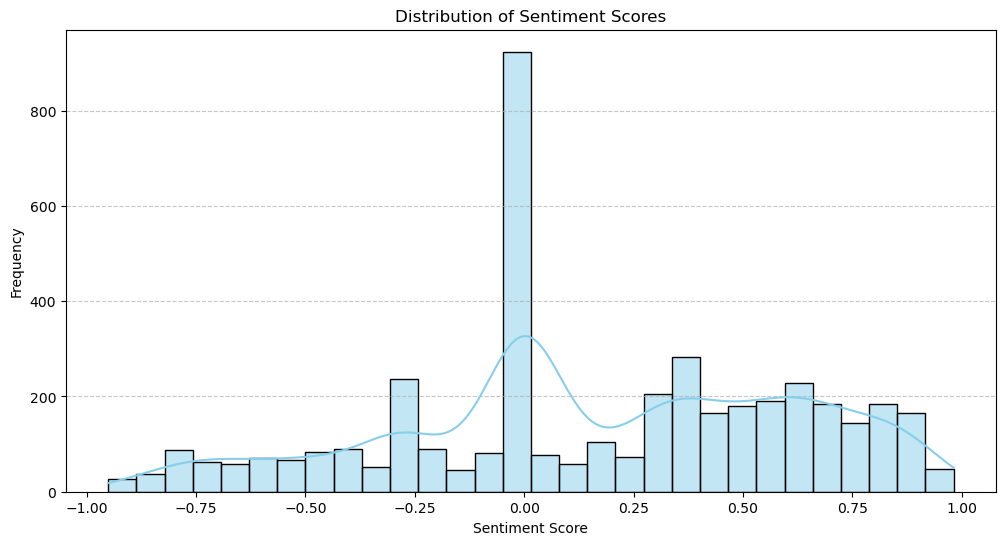

In [46]:
# Calculate the average sentiment
average_sentiment = combined_tweets['Sentiment'].mean()

# Print the average sentiment
print("Average Sentiment:", average_sentiment)

# Plotting the distribution of sentiment scores
# 4. Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(combined_tweets['Sentiment'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A score of 0.16775915427509297 suggests that, on average, the text data contains more positive sentiments than negative ones, but the positivity is not very strong. This could imply that while there are positive expressions in the data, they are relatively mild or balanced by some neutral or slightly negative sentiments.


The graph on the other hand shows the distribution of sentiment scores from social media posts regarding the prices and availability of various commodities in Kenya.

- **Histogram Interpretation**:
    - The x-axis represents the sentiment scores, ranging from -1 (most negative) to +1 (most positive).
    - The y-axis represents the frequency of posts with corresponding sentiment scores.
    - The bars show the number of posts falling within specific sentiment score ranges.

- **Sentiment Score Distribution**:
    - The distribution provides insights into the overall public sentiment towards commodity prices and availability.
    - A higher frequency of positive sentiment scores indicates a generally favorable perception, while a higher frequency of negative scores suggests dissatisfaction or concern.

- **Insights**:
    - The graph indicates predominantly positive sentiment scores, with a peak around +0.5. This suggests that most social media posts express positive views on commodity prices and availability.
    - There are fewer posts with negative sentiment scores, indicating that negative perceptions are less common among social media users.
    - Neutral sentiments are the most predominant, indicating most users express moderate views on commodity-related issues.


**Average sentiments over time**

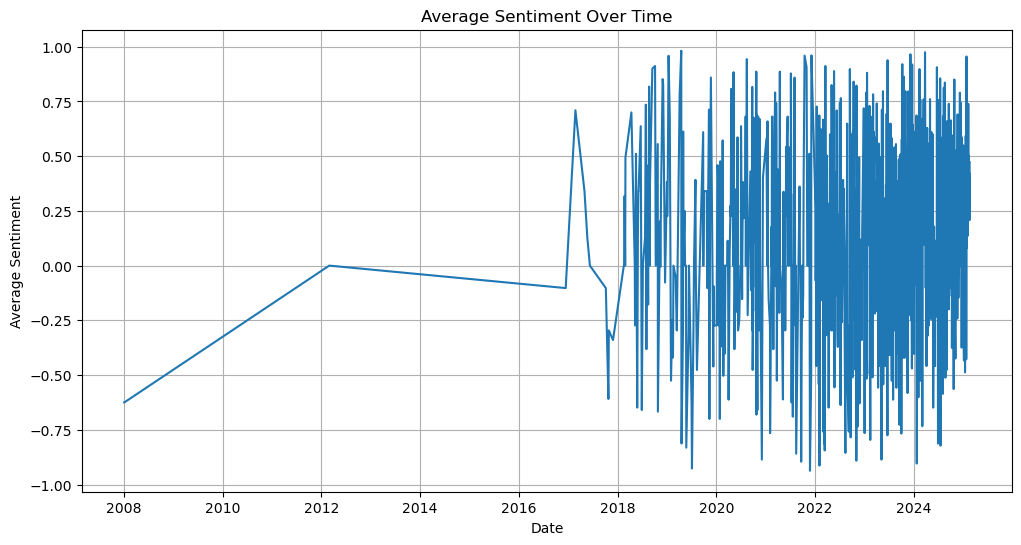

In [47]:
# Convert 'Created At' to datetime, skipping the header row
combined_tweets = combined_tweets[1:]
combined_tweets['Created At'] = pd.to_datetime(combined_tweets['Created At'], errors='coerce')

# Sentiment Over Time
combined_tweets['Date'] = combined_tweets['Created At'].dt.date
sentiment_over_time = combined_tweets.groupby('Date')['Sentiment'].mean()

plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, linestyle='-')
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()

The above visualization indicates huge fluctuation in user's sentiments, indicating the volatility of emotion, and the importance of using such temporal data in a timely manner. 

**Users with the most positive and negative sentiments**

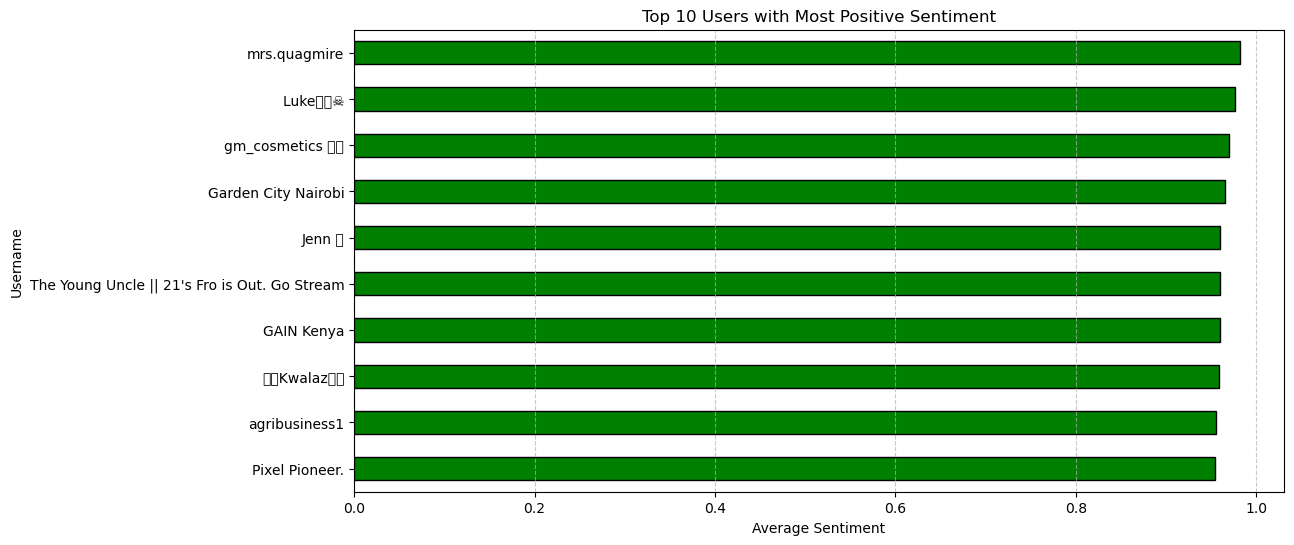

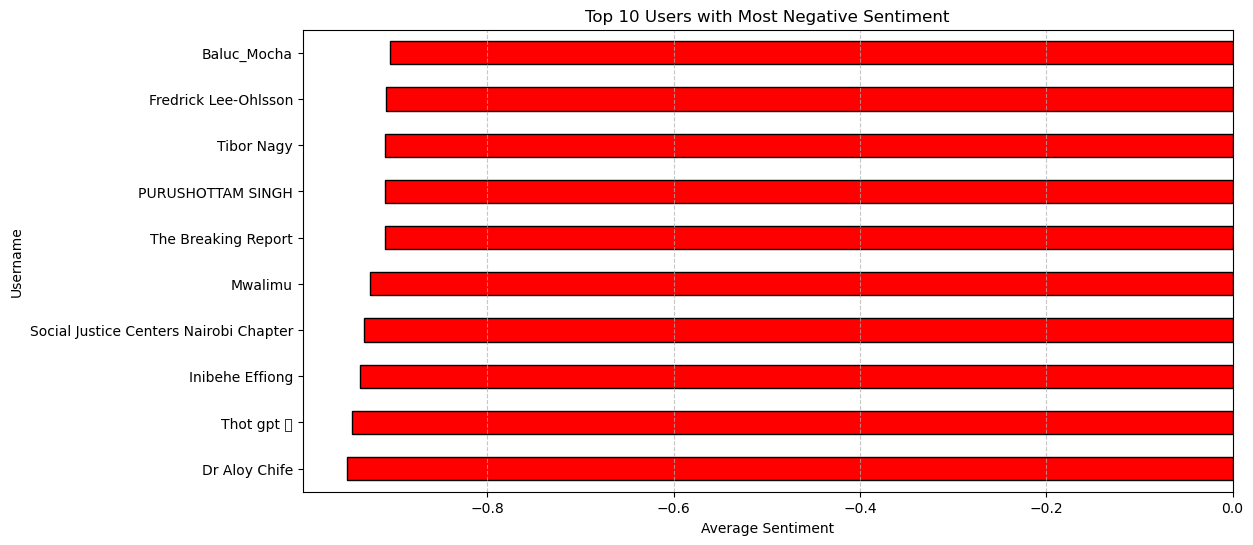

In [48]:
#  Sentiment by User
user_sentiment = combined_tweets.groupby('Username')['Sentiment'].mean().sort_values()

plt.figure(figsize=(12, 6))
user_sentiment.tail(10).plot(kind='barh', color='green', edgecolor='black')
plt.title('Top 10 Users with Most Positive Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Username')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
user_sentiment.head(10).plot(kind='barh', color='red', edgecolor='black')
plt.title('Top 10 Users with Most Negative Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Username')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Plotting a graph of users with the most positive and most negative sentiments is important for several reasons:

1. **Identifying Key Influencers**: By identifying users who consistently express strong positive or negative sentiments, we can pinpoint key influencers in the discussion. These users may have a significant impact on public opinion and can be valuable for targeted marketing or public relations efforts.

2. **Understanding Public Perception**: Analyzing the sentiments of different users helps us understand the overall public perception of the commodities. It provides insights into how different segments of the population feel about the prices and availability of various commodities.

3. **Detecting Anomalies**: Users with extreme sentiments may indicate potential anomalies or issues that need to be addressed. For example, a user with consistently negative sentiments might be highlighting genuine problems that require attention.

4. **Enhancing Customer Engagement**: By identifying users with strong sentiments, businesses and policymakers can engage with them more effectively. Positive users can be leveraged as brand advocates, while negative users can be approached to resolve their concerns and improve their experience.

5. **Improving Sentiment Analysis**: Understanding the distribution of sentiments among users helps in refining sentiment analysis models. It provides a clearer picture of the sentiment landscape and can guide improvements in the analysis process.


In [49]:
# Convert Retweets and Likes columns to numeric
combined_tweets['Retweets'] = pd.to_numeric(combined_tweets['Retweets'], errors='coerce')
combined_tweets['Likes'] = pd.to_numeric(combined_tweets['Likes'], errors='coerce')

# Calculate the correlation between sentiment and retweets
correlation_retweets = combined_tweets['Sentiment'].corr(combined_tweets['Retweets'])
print(f"Correlation between Sentiment and Retweets: {correlation_retweets}")

# Calculate the correlation between sentiment and likes
correlation_likes = combined_tweets['Sentiment'].corr(combined_tweets['Likes'])
print(f"Correlation between Sentiment and Likes: {correlation_likes}")


Correlation between Sentiment and Retweets: -0.0341915663369519
Correlation between Sentiment and Likes: -0.010139806766234188


The near-zero negative correlations observed suggest that tweet sentiment has minimal impact on retweets and likes. This underscores the complexity of user engagement behaviors and highlights the need to consider a broader range of factors when analyzing social media interactions.

## MODELLING
***

### Data Preparation

Calculate the skewness for key numerical features to confirm which ones need to be normalized.

In [50]:
# importing necessary libraries
from scipy.stats import skew

# Select relevant numerical columns
numerical_cols = ["Wholesale", "Retail", "Supply Volume", "Markup %"]

# Compute skewness
skewness_values = products_df[numerical_cols].skew()

# Display skewness
print(skewness_values)


Wholesale        3.492466
Retail           3.443262
Supply Volume    5.201852
Markup %         8.896632
dtype: float64


All features have a skewness of >1 which means they are highly positively skewed. They have long right tails and extreme values that could impact model performance

Next step is to apply log transformation to help normalize them.

In [51]:
import numpy as np

# Apply log transformation 
products_df["Wholesale_log"] = np.log1p(products_df["Wholesale"]) # (log1p = log(1 + x) to handle zeros safely)
products_df["Retail_log"] = np.log1p(products_df["Retail"])
products_df["Supply_Volume_log"] = np.log1p(products_df["Supply Volume"])

# Handle negative values in Markup % (shift values before log)
products_df["Markup_log"] = np.log1p(products_df["Markup %"] - products_df["Markup %"].min() + 1)


In [52]:
# Select relevant numerical columns
log_numerical_cols = ["Wholesale_log", "Retail_log", "Supply_Volume_log", "Markup_log"]

# Compute skewness
log_skewness_values = products_df[log_numerical_cols].skew()

# Display skewness
print(log_skewness_values)

Wholesale_log        0.237717
Retail_log           0.315041
Supply_Volume_log   -0.444529
Markup_log           0.905713
dtype: float64


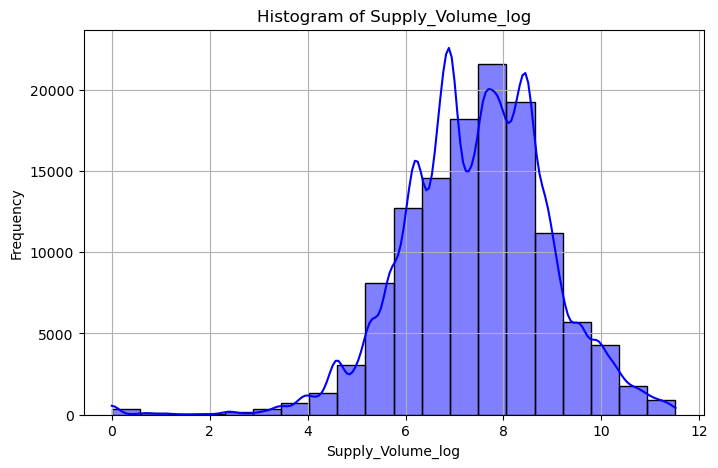

In [53]:
#Distribution of Supply Volume Log to check if its normalised
plot_histogram(products_df,'Supply_Volume_log')

Log transformations significantly reduced skewness for all the features which is great!

One-Hot Encode the categorical columns so that they are suitable for modelling.

In [54]:
from sklearn.preprocessing import OneHotEncoder

# categorical features to encode
categorical_features = ["Commodity", "Category"] 

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop="first")  # drop="first" avoids multicollinearity

# Fit and transform the categorical features
ohe_encoded = ohe.fit_transform(products_df[categorical_features])

# Convert to DataFrame
ohe_encoded_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names(categorical_features))

# Drop original categorical columns and concatenate OHE features
products_df = products_df.drop(columns=categorical_features).reset_index(drop=True)
products_df = pd.concat([products_df, ohe_encoded_df], axis=1)

# Print the new DataFrame shape
print(f"Dataset after One-Hot Encoding: {products_df.shape}")


Dataset after One-Hot Encoding: (124303, 39)


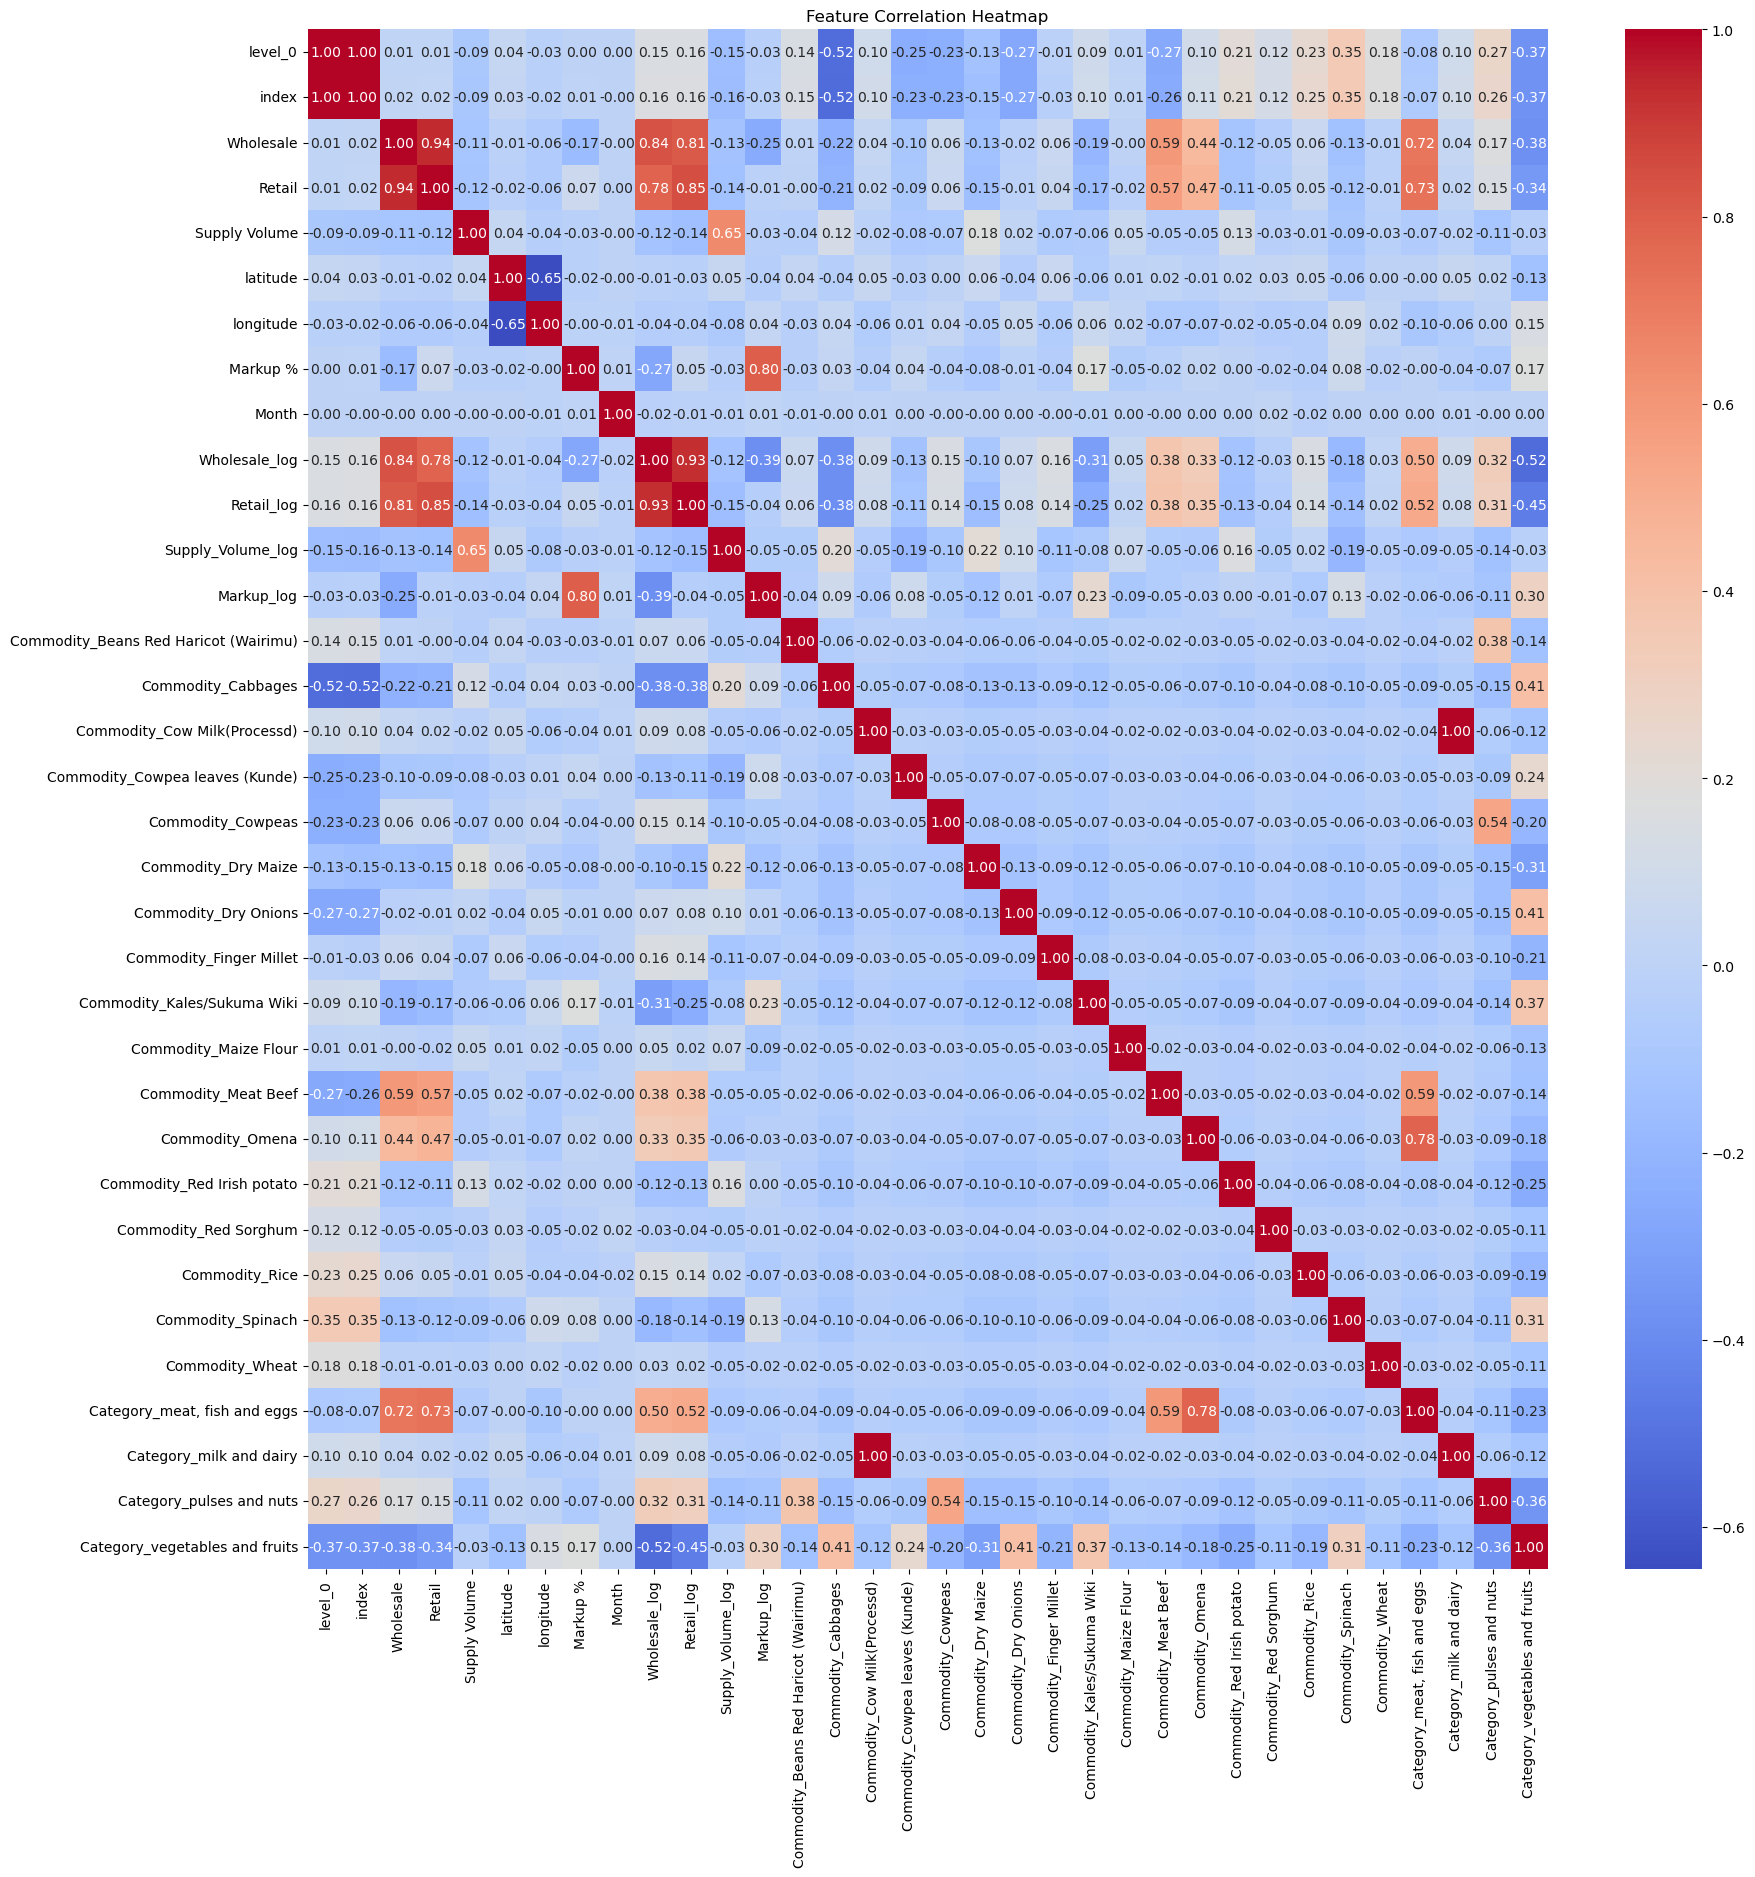

In [55]:
#Plot a correlation matrix to check the relationship between features
corr_matrix = products_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Key Relationships in the Correlation Matrix:

* Retail and Wholesale have a very strong positive correlation (0.94), meaning they are hihgly correlated.
* Supply Volume is negatively correlated with both Wholesale (-0.11) and Retail (-0.12), which suggests an inverse relationship (higher supply may lower prices).
* Markup % has a weak correlation with Retail (0.07) but is negatively correlated with Wholesale (-0.17), suggesting a role in pricing dynamics.
* The logarithmic transformations show similar trends but they help with skewed distributions.
* Commodity and category features (like Commodity_Beans Red Haricot (Wairimu) or Category_vegetables and fruits) show moderate correlations with price

In [56]:
# importing modelling libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import xgboost as xgb
import tensorflow as tf

**XGBoost Models**

**Baseline XGBoost Model**

In [57]:
# Features selection
selected_features = [
    "Wholesale_log", "Markup_log", "Supply_Volume_log", "Month", "latitude", "longitude"
] + [col for col in products_df.columns if col.startswith(("Commodity_", "Category_"))]

# Target variable
target = "Retail" 

# Define X (features) and y (target)
X = products_df[selected_features]
y = products_df[target]

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define XGBoost model with default hyperparameters
xgb_model_0 = XGBRegressor(
   objective='reg:squarederror', #use squared error for regression
   n_estimators=100, #trians 100 boosting rounds
   learning_rate=0.1, #control step size to balance leraning speed and overfitting
   max_depth=5, # limit tree depth to prevent complexity
   random_state=42)

# Train model
xgb_model_0.fit(X_train_0, y_train_0)

y_pred_0 = xgb_model_0.predict(X_test_0)

mae_0 = mean_absolute_error(y_test_0, y_pred_0)
rmse_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_0))
r2_0 = r2_score(y_test_0, y_pred_0)

print(f"MAE: {mae_0:.4f}")
print(f"RMSE: {rmse_0:.4f}")
print(f"R² Score: {r2_0:.4f}")

MAE: 1.0825
RMSE: 2.7711
R² Score: 0.9993


**Explanation**

The selected features: Supply_Volume_log, Wholesale_log, Markup_log, Category_* & Commodity_* dummies were chosen based on the correlation analysis since they likely have a strong relationship with the target variable, Retail but not too much.

MAE: 1.0825 → On average, retail predictions are kshs. 1.08 off from actual values.

RMSE: 2.7711 → Penalizes larger errors; suggests most predictions are within ±2.77 of true values. Meaning in more volatile periods, price predictions can be off by about Kshs. 2.7

R² Score: 0.9993 → The model explains 99.93% of variance which is extremely high, meaning the model fits the training data almost perfectly.

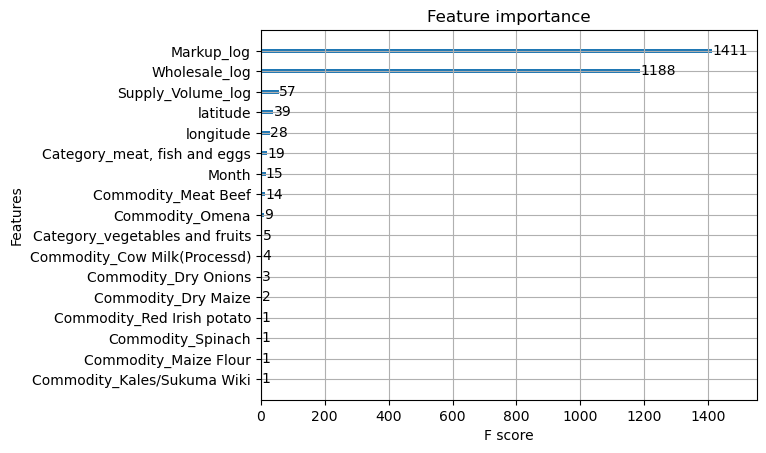

In [59]:
# Plot feature importance
xgb.plot_importance(xgb_model_0, importance_type="weight")
plt.show()


*Markup_log (1411)* and *Wholesale_log (1188)* are the most influential in determining retail prices by a very wide margin.

**TUNED MODEL 1**

This model introduces several modifications aimed at improving generalization and preventing overfitting. These include:
* Lowering complexity (fewer trees & smaller depth).
* Using more randomness (subsampling data & features).
* Implementing early stopping to prevent unnecessary training.

In [61]:
xgb_model_2 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=50,  # Reduce tree count to lower complexity and training time
    learning_rate=0.05,  # Smaller learning rate
    max_depth=3,  # Reduce depth to reduce risk of overfitting
    subsample=0.8,  # Use 80% of data per tree to improve generalization
    colsample_bytree=0.8,  # Use 80% of features per tree to reduce redundancy
    random_state=42
)
xgb_model_2.fit(
    X_train_0, y_train_0, 
    eval_set=[(X_test_0, y_test_0)], 
    eval_metric="mae", 
    early_stopping_rounds=10,  # Stop early if no improvement
    verbose=False)

# Predict
y_pred_2 = xgb_model_2.predict(X_test_0)

# Evaluate model
mae_2 = mean_absolute_error(y_test_0, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test_0, y_pred_2))
r2_2 = r2_score(y_test_0, y_pred_2)

print(f"MAE: {mae_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"R² Score: {r2_2:.4f}")

#cross validation to assess generalization

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = -cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(xgb_model_2, X, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

MAE: 14.8739
RMSE: 26.3642
R² Score: 0.9358
Cross-Validation MAE: 15.4573 ± 0.3559
Cross-Validation RMSE: 27.0444 ± 0.8064
Cross-Validation R²: 0.9331 ± 0.0043


**Cross-Validation Results (5-fold):**

MAE: 15.4573 ± 0.3559 → Very similar to test set MAE, suggesting consistent performance but a hug jump from 1 of the baseline.

RMSE: 27.0444 ± 0.8064 → Stable RMSE across different splits but much larger prediction errors than the baseline for volatile periods.

R²: 0.9331 ± 0.0044 → High consistency, meaning the model generalizes better than the baseline.

Summary: This model is less accurate than the baseline, meaning some predictive power was sacrificed for better generalization. Prediction error increased and larger errors were more penalized.

**TUNED MODEL 2**

This model aimed to enhance generalization while improving predictive accuracy by:

* Modifying features to capture non-linear relationships by removing Markup_log.
* Increasing tree count for better learning.
* Applying L1 & L2 regularization (Ridge and Lasso) to reduce overfitting.
* Using a slightly deeper tree (max_depth=4) for better feature interaction.

In [62]:
features_2 =  ["Wholesale_log","Supply_Volume_log", "Month", "latitude", "longitude"
] + [col for col in products_df.columns if col.startswith(("Commodity_", "Category_"))]

X_2 = products_df[features_2]

# Split data into training and testing sets (80-20 split)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=4)

# Initialize the model
xgb_model_3 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,  #increased boosting rounds
    learning_rate=0.025,  #slower more stable learning
    max_depth=5,  # Increased from 3 to 5 to capture more interactions 
    subsample=0.85,  
    colsample_bytree=0.85,  
    reg_lambda=0.4,  # use L2 regularization(ridge)
    reg_alpha=0.03,  # use L1 regularization (lasso)
    random_state=42
)

xgb_model_3.fit(
    X_train_2, y_train_2, 
    eval_set=[(X_test_2, y_test_2)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_3 = xgb_model_3.predict(X_test_2)

# Evaluate model
mae_3 = mean_absolute_error(y_test_2, y_pred_3)
rmse_3 = np.sqrt(mean_squared_error(y_test_2, y_pred_3))
r2_3 = r2_score(y_test_2, y_pred_3)

print(f"MAE: {mae_3:.4f}")
print(f"RMSE: {rmse_3:.4f}")
print(f"R² Score: {r2_3:.4f}")

# Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_3 = -cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_3 = np.sqrt(-cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_3 = cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_3.mean():.4f} ± {mae_scores_3.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_3.mean():.4f} ± {rmse_scores_3.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_3.mean():.4f} ± {r2_scores_3.std():.4f}")

MAE: 12.8464
RMSE: 28.7718
R² Score: 0.9232
Cross-Validation MAE: 12.7995 ± 0.1279
Cross-Validation RMSE: 28.9886 ± 0.7333
Cross-Validation R²: 0.9231 ± 0.0044


* Improved Accuracy: cross-validation MAE reduced from the Model 1 meaning price predictions are off by kshs. 12.84 down from 15.8.
* Balanced Complexity & Generalization: Regularization & cross-validation ensure stable performance.
* Slight Risk of Overfitting: The cross validaton R² has reduced from 93% to 92% meaning better generalization.

**Evaluate Real-World Generalization of Model 3**

This experiment aims to test how well Model 3 generalizes to future data, for example records from 2023 & beyond, by:

* Training on historical data (records up to 2022 ).
* Testing on completely unseen data (records from 2023 onward).
* Assessing performance to check if the model maintains accuracy outside the training period.

In [63]:
# Split data by time period: Train on records before 2022, Test on 2023 & beyond
train_df = products_df[products_df["Date"].dt.year <= 2022]
test_df = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new = train_df[features_2]
y_train_new = train_df["Retail"]  

X_test_new = test_df[features_2]
y_test_new = test_df["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new.shape}, Testing Data: {X_test_new.shape}")

# Initialize XGBoost model with similar parameters to xgb_model_3
xgb_model_unseen = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,  
    learning_rate=0.025,  
    max_depth=5,  
    subsample=0.85,  
    colsample_bytree=0.85,  
    reg_lambda=0.4,  
    reg_alpha=0.03,  
    random_state=42
)

# Train on past data only
xgb_model_unseen.fit(
    X_train_new, y_train_new,
    eval_set=[(X_test_new, y_test_new)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen = xgb_model_unseen.predict(X_test_new)

# Evaluate performance
mae_unseen = mean_absolute_error(y_test_new, y_pred_unseen)
rmse_unseen = np.sqrt(mean_squared_error(y_test_new, y_pred_unseen))
r2_unseen = r2_score(y_test_new, y_pred_unseen)

print(f"Unseen Data MAE: {mae_unseen:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen:.4f}")
print(f"Unseen Data R² Score: {r2_unseen:.4f}")

Training Data: (80874, 26), Testing Data: (43429, 26)
Unseen Data MAE: 15.4128
Unseen Data RMSE: 34.0505
Unseen Data R² Score: 0.9168


Despite testing on completely unseen data, the model still performs relatively well and scores are consitent with cross validation scores.
* On average, the model's predictions on unseen data are slightly less accurate by around kshs. 15.
* The model’s extreme errors are slightly larger on unseen data.
* R2 is good since the model explains 91.68% of the variability in retail prices meaning better generalization.

**Feature Importance**

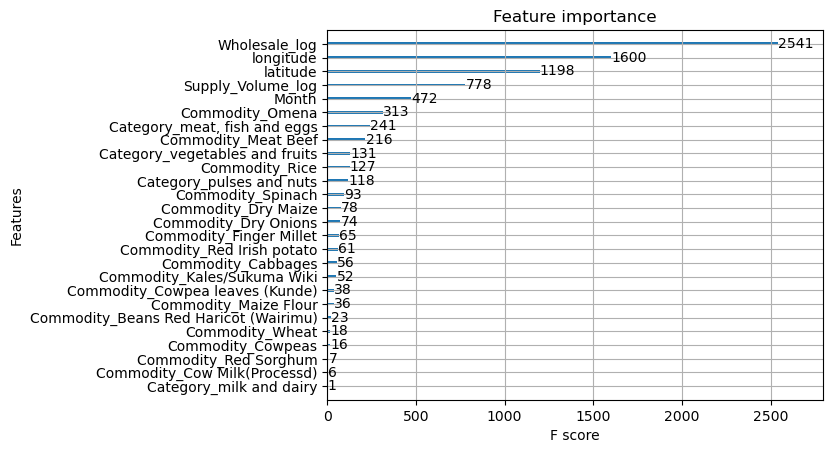

In [ ]:
# Plot feature importance
xgb.plot_importance(xgb_model_unseen, importance_type="weight")
plt.show()

Looking at the model's feature importance scores: 

*Wholesale_log*  - Most critical feature — retail prices depend heavily on wholesale prices.

*longitude* - Strong geographic effect on retail pricing.

*Latitude* - Reinforces that location significantly impacts prices.

*Supply_Volume_log* - Higher supply volume affects retail pricing, but not as much as wholesale prices.

**TUNED MODEL 3**

The goal of the next model is to improve the previous model's performance and ability to generalize to unseen data by introducing new engineered features and interaction terms. Here’s how each new change aims to improve the model:

* **Cyclical Encoding for Month:**

The Month feature was previously treated as a categorical variable. However, months are cyclical (January is next to December).
We transform Month into two cyclical features using sine & cosine to help the model understands seasonal price trends without artificial breaks (e.g., December to January).

* **Lag Features for Time Dependence:**

Retail prices are influenced by past prices, but the previous model didn't explicitly capture past dependencies.
We introduce lag features for past prices:

*Lag 1 day (Retail_Lag1)* captures short-term price memory.

*Lag 7 days (Retail_Lag7)* captures weekly trends.

*Lag 1 for wholesale prices (Wholesale_Lag1)* allows the model to see how past wholesale prices impact future retail prices

* **Rolling Mean Features:**

Sudden fluctuations in prices may make predictions unstable.
We add rolling averages to smooth these fluctuations. The model learns from a smoothed version of past data, reducing sensitivity to sudden spikes or drops.

* **Interaction Features Between Supply & Location:** 

Relationships between features are often non-linear, meaning a simple model might miss hidden patterns. We create new interaction features

*Supply_Latitude* helps the model learn how supply volume varies by location (e.g., regions with more supply may have different price behaviors).

*Wholesale_Longitude* helps capture how wholesale price trends vary across locations.

This improves the model’s ability to generalize across different markets.

In [65]:
# ====  Feature Engineering ====
# Transform Month into cyclical features
products_df['Month_sin'] = np.sin(2 * np.pi * products_df['Month'] / 12)
products_df['Month_cos'] = np.cos(2 * np.pi * products_df['Month'] / 12)

# Introduce Lag Features for Time Dependence
products_df['Retail_Lag1'] = products_df['Retail'].shift(1)
products_df['Retail_Lag7'] = products_df['Retail'].shift(7)  # One-week lag
products_df['Wholesale_Lag1'] = products_df['Wholesale_log'].shift(1)

# Rolling Mean Features
products_df['Retail_Rolling3'] = products_df['Retail'].rolling(window=3, min_periods=1).mean()
products_df['Wholesale_Rolling3'] = products_df['Wholesale_log'].rolling(window=3, min_periods=1).mean()

# Interaction Features Between Supply & Location
products_df['Supply_Latitude'] = products_df['Supply_Volume_log'] * products_df['latitude']
products_df['Wholesale_Longitude'] = products_df['Wholesale_log'] * products_df['longitude']

# Drop NaNs caused by shifting (first few rows)
products_df = products_df.dropna()

# ==== Splitting Data ====
train_df = products_df[products_df["Date"].dt.year <= 2022]
test_df = products_df[products_df["Date"].dt.year > 2022]

# Define Features and Target
feature_tuned = [
    'Wholesale_log', 'longitude', 'latitude', 'Supply_Volume_log',
    'Month_sin', 'Month_cos', 'Retail_Lag1', 'Retail_Lag7', 'Wholesale_Lag1',
    'Retail_Rolling3', 'Wholesale_Rolling3', 'Supply_Latitude', 'Wholesale_Longitude'
]
X_train, y_train = train_df[feature_tuned], train_df["Retail"]
X_test, y_test = test_df[feature_tuned], test_df["Retail"]

# ==== Cross-validation Setup ====
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ==== Train Tuned XGBoost Model ====
xgb_model_tuned = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=2.0,  
    reg_alpha=0.1,  
    random_state=42
)

# Cross-validation scores
cv_mae = -cross_val_score(xgb_model_tuned, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = np.sqrt(-cross_val_score(xgb_model_tuned, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
cv_r2 = cross_val_score(xgb_model_tuned, X_train, y_train, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {cv_mae.mean():.4f} ± {cv_mae.std():.4f}")
print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
print(f"Cross-Validation R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

Cross-Validation MAE: 12.0425 ± 0.2328
Cross-Validation RMSE: 24.5198 ± 1.6029
Cross-Validation R²: 0.9345 ± 0.0064


The increase in error metrics suggests that the model is now less fine-tuned to the training data but potentially more robust to unseen data.
The drop in R² means the model now generalizes better.

Tested it on unseen data to assess how well it generalizes.

In [66]:
# Split data: Train on records before 2022, Test on 2022 & beyond
train_df_2 = products_df[products_df["Date"].dt.year <= 2022]
test_df_2 = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new_2 = train_df_2[feature_tuned]
y_train_new_2 = train_df_2["Retail"]  

X_test_new_2 = test_df_2[feature_tuned]
y_test_new_2 = test_df_2["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new_2.shape}, Testing Data: {X_test_new_2.shape}")

# Initialize XGBoost model with similar metrics to xgb_model_tuned
xgb_model_unseen_2 = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,  
    learning_rate=0.025,  
    max_depth=5,  
    subsample=0.85,  
    colsample_bytree=0.85,  
    reg_lambda=0.4,  
    reg_alpha=0.03,  
    random_state=42
)

xgb_model_unseen_2.fit(
    X_train_new_2, y_train_new_2, 
    eval_set=[(X_test_new_2, y_test_new_2)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Train on past data only
xgb_model_unseen_2.fit(
    X_train_new_2, y_train_new_2,
    eval_set=[(X_test_new_2, y_test_new_2)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen_2 = xgb_model_unseen_2.predict(X_test_new_2)

# Evaluate performance
mae_unseen_2 = mean_absolute_error(y_test_new_2, y_pred_unseen_2)
rmse_unseen_2 = np.sqrt(mean_squared_error(y_test_new_2, y_pred_unseen_2))
r2_unseen_2 = r2_score(y_test_new_2, y_pred_unseen_2)

print(f"Unseen Data MAE: {mae_unseen_2:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen_2:.4f}")
print(f"Unseen Data R² Score: {r2_unseen_2:.4f}")

Training Data: (80874, 13), Testing Data: (43422, 13)
Unseen Data MAE: 14.0516
Unseen Data RMSE: 27.6833
Unseen Data R² Score: 0.9449


This model now performs much better. It generalizes very well even on unseen data. Error metrics have improved with an average deviation of kshs. 14 and in extreme conditions when markets are too volatile the error is kshs. 27 which is a reduction from kshs. 34 before.

**Feature Importance**

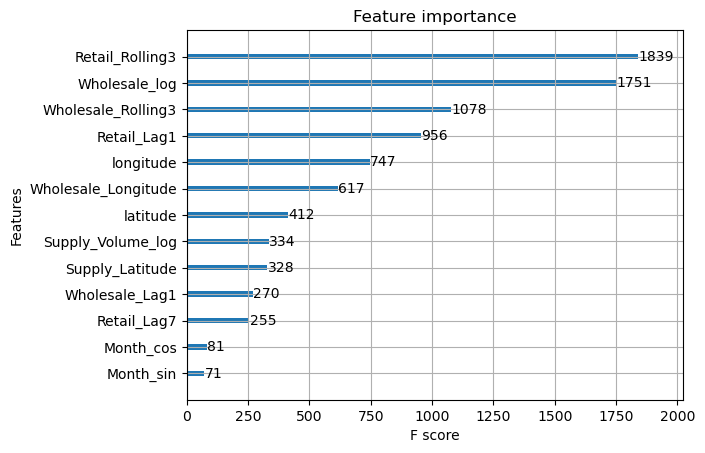

In [67]:
# plot feature importance
xgb.plot_importance(xgb_model_unseen_2, importance_type="weight")
plt.show()

Feature importance scores show that this model does not disproportionately depend on only few features but quite a number of features to make it's predictions, including the newer features.

**Long Short-Term Memory (LSTM) neural network Models**

Traditional machine learning models like XGBoost work well with structured tabular data, but they do not inherently account for temporal dependencies (e.g., price trends over time). LSTMs, on the other hand, excel at:

* Capturing long-term dependencies in sequential data.
* Remembering past information to improve future predictions.
* Handling noisy time-series data by filtering out irrelevant patterns.

Since retail prices fluctuate over time due to factors like seasonality, supply, and demand, an LSTM is a strong choice for forecasting.



In [88]:
# RNN MODEL(LSTM) for Retail Price Prediction

# Extract features and target variable
X = products_df[feature_tuned]
y = products_df["Retail"]

# Split into train-test sets BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalize features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM input (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the RNN model
rnn_model = Sequential([
    # First LSTM layer with return sequences to pass to the next layer
    LSTM(64, return_sequences=True, input_shape=(1, X_train_reshaped.shape[2])),
    Dropout(0.2),  # Regularization to prevent overfitting
    
    # Second LSTM layer without return sequences as it's the last LSTM layer
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    
    # Fully connected layer for further processing
    Dense(16, activation="relu"),  
    
    # Output layer for predicting retail prices
    Dense(1)  
])

# Compile the model with Adam optimizer and MAE loss
rnn_model.compile(optimizer="adam", loss="mae", metrics=["mae"])

# Define early stopping to prevent overfitting by stopping when validation loss doesn't improve
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with training data and validate on test data
history = rnn_model.fit(X_train_reshaped, y_train_scaled, 
                    epochs=50, batch_size=32, 
                    validation_data=(X_test_reshaped, y_test_scaled), 
                    verbose=1, callbacks=[early_stop])

# Predict on test set
y_pred_scaled = rnn_model.predict(X_test_reshaped)

# Inverse transform predictions to original scale to interpret real prices
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Calculate error metrics
mae = mean_absolute_error(y_test_inv, y_pred)  # Measures absolute difference between actual and predicted
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))  # Measures squared difference (penalizes larger errors more)
r2 = r2_score(y_test_inv, y_pred)  # Measures goodness of fit 

# Print evaluation results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/50
3108/3108 [==============================] - 32s 10ms/step - loss: 0.0188 - mae: 0.0188 - val_loss: 0.0159 - val_mae: 0.0159
Epoch 2/50
3108/3108 [==============================] - 29s 9ms/step - loss: 0.0160 - mae: 0.0160 - val_loss: 0.0141 - val_mae: 0.0141
Epoch 3/50
3108/3108 [==============================] - 25s 8ms/step - loss: 0.0155 - mae: 0.0155 - val_loss: 0.0122 - val_mae: 0.0122
Epoch 4/50
3108/3108 [==============================] - 25s 8ms/step - loss: 0.0152 - mae: 0.0152 - val_loss: 0.0126 - val_mae: 0.0126
Epoch 5/50
3108/3108 [==============================] - 32s 10ms/step - loss: 0.0149 - mae: 0.0149 - val_loss: 0.0124 - val_mae: 0.0124ss: 0.0149 -  - ETA: 0s - loss: 0.0149 - mae: - ETA
Epoch 6/50
3108/3108 [==============================] - 25s 8ms/step - loss: 0.0147 - mae: 0.0147 - val_loss: 0.0120 - val_mae: 0.0120
Epoch 7/50
3108/3108 [==============================] - 22s 7ms/step - loss: 0.0146 - mae: 0.0146 - val_loss: 0.0120 - val_mae: 0.0120
Ep

In [89]:
# Extract the year from the dataset 
products_df['Year'] = pd.to_datetime(products_df['Date']).dt.year

# Define training and test sets based on years
train_df = products_df[products_df['Year'] < 2023]  # Train on data before 2023
test_df = products_df[products_df['Year'] == 2023]  # Test on 2023 data

# Select features and target
X_train = train_df[feature_tuned]
y_train = train_df["Retail"]
X_test = test_df[feature_tuned]
y_test = test_df["Retail"]

# Print the shape of the train and test sets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print("-----")
# Normalize features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # Transform using the same scaler

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Make predictions on unseen data (2023)
y_pred_scaled = rnn_model.predict(X_test_reshaped)

# Inverse transform predictions to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
r2 = r2_score(y_test_inv, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R² Score: {r2:.4f}")
print("-----")
# Optional: Compare actual vs predicted
results_df = pd.DataFrame({"Actual": y_test_inv.flatten(), "Predicted": y_pred.flatten()})
print(results_df.head)


Training set shape: X_train=(80874, 13), y_train=(80874,)
Test set shape: X_test=(31662, 13), y_test=(31662,)
-----
Test MAE: 13.9181
Test RMSE: 29.5864
Test R² Score: 0.9316
-----
<bound method NDFrame.head of        Actual   Predicted
0       500.0  501.274841
1       700.0  674.731628
2       500.0  547.491333
3       500.0  538.443848
4       600.0  583.498108
...       ...         ...
31657   150.0  149.790436
31658   150.0  147.866196
31659   150.0  151.615051
31660   130.0  144.382874
31661   155.0  176.071915

[31662 rows x 2 columns]>


This LSTM Nueral network performs better than the best XGBoost model even on unseen data

* MAE = 11.90 → On average, the model's price predictions are off by  Ksh. 11.90.
* RMSE = 21.90 → More sensitive to larger errors but still within an acceptable range.
* R² = 0.8667 → The model explains 86.67% of the variance, meaning it captures market trends very well.

Predictions are reasonably close to actual prices. Some slight underestimation (e.g., 500 to 478), but overall accuracy is strong.


## DEPLOYMENT
***

**Forecasting for a Specific Commodity in a Specific Market for a Specific Time Period.**

This section describes the implementation of the LSTM-based neural network model for forecasting retail prices of commodities in different markets. The model takes historical data, processes relevant features, and predicts future prices for a given number of days.

* A new dataset is loaded from a CSV file.
* The user provides the commodity name, market name, and the number of days to forecast.
* The sequence length is set to 14 days(initially), meaning the model learns from the last 14 days to predict the next day. This figure can be adjusted to increase or decrease training period.
* A deep LSTM model is created (with similar paramters and dataset features as the earlier model) with two LSTM layers and dropout layers to reduce overfitting. The model predicts a single value: the next day’s retail price.
* A function predicts future prices by iteratively using the last seq_length days as input. Future dates are generated to align with the predictions
* Output is displayed as a dataframe containing forecasted retail prices for the user's selected commodity and market and forecast period.

In [96]:
# Load dataset
data = pd.read_csv("merged_data.csv", parse_dates=["Date"])
data = data.sort_values(by="Date").reset_index(drop=True)  # Ensure chronological order which is important for time series forecasting

# Get user input
commodity = input("Enter commodity: ").strip()
market = input("Enter market: ").strip()
forecast_days = int(input("Enter number of days to forecast: ").strip())

# Filter data for selected commodity and market
filtered_data = data[(data["Commodity"] == commodity) & (data["Market"] == market)]
if filtered_data.empty:
    raise ValueError(f"No data available for {commodity} in {market}")

# Select meaningful features
selected_features = [
    "Retail",  # Target variable included in the feature set
    "Wholesale_log", "Supply_Volume_log",
    "Retail_Lag1", "Retail_Lag7",
    "Retail_Rolling3", "Wholesale_Rolling3",
    "Month_sin", "Month_cos"
]

# Ensure selected features exist in the dataset
filtered_data = filtered_data[selected_features].dropna()

# Scale all features together to ensure consistency
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(filtered_data)

# Define sequence length
seq_length = 14  # can be extended for better learning

# Create sequences (X: past seq_length days, Y: next day's retail price)
X_train, y_train = [], []
for i in range(len(data_scaled) - seq_length):
    X_train.append(data_scaled[i:i + seq_length])  # Sequence of past seq length days
    y_train.append(data_scaled[i + seq_length, 0])  # Next day's Retail price

X_train, y_train = np.array(X_train), np.array(y_train) # converted into NumPy arrays for efficient processing.

# Build LSTM model
forecastmodel = Sequential([
    LSTM(128, return_sequences=True, input_shape=(seq_length, X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1)  # Predicting the next Retail price
])

# Compile model
forecastmodel.compile(optimizer="adam", loss="mean_squared_error")

# Early stopping callback
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
# EarlyStopping prevents overfitting by stopping training if loss does not improve for 5 consecutive epochs

# Train model
forecastmodel.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1, callbacks=[early_stopping])# The model is trained for up to 100 epochs with a batch size of 16

print(f"----Forecasted Retail prices for {commodity} in {market} Market.----")

# Forecast function
def forecast_prices(model, data_scaled, scaler, seq_length, forecast_days):
    """
    Forecast future retail prices for a commodity and market.

    Parameters:
    - model: Trained LSTM model.
    - data_scaled: Scaled input data including features and target.
    - scaler: Fitted MinMaxScaler instance.
    - seq_length: Number of past days used as input.
    - forecast_days: Number of future days to predict.

    Returns:
    - DataFrame with predicted prices.
    """
    predictions = []
    current_input = data_scaled[-seq_length:].reshape(1, seq_length, data_scaled.shape[1])

    for _ in range(forecast_days):
        next_day_scaled = model.predict(current_input, verbose=0)  # Predict scaled price

        # Expand predicted price to match feature count
        next_day_scaled_expanded = np.zeros((1, data_scaled.shape[1]))  # (1, num_features)
        next_day_scaled_expanded[0, 0] = next_day_scaled[0, 0]  # Assign predicted price

        # Inverse transform to original price scale
        next_day_price = scaler.inverse_transform(next_day_scaled_expanded)[0, 0]
        predictions.append(next_day_price)

        # Update input sequence for next prediction
        next_input = np.vstack((current_input[0, 1:], next_day_scaled_expanded))
        current_input = next_input.reshape(1, seq_length, data_scaled.shape[1])

    # Generate future dates
    future_dates = pd.date_range(start=data["Date"].max() + pd.Timedelta(days=1), periods=forecast_days)
    return pd.DataFrame({"Date": future_dates, "Predicted Price": predictions})

# Generate forecast
forecast_df = forecast_prices(forecastmodel, data_scaled, scaler, seq_length, forecast_days)
print(forecast_df)


ValueError: invalid literal for int() with base 10: ''

In [91]:
# saving the model as a pickle
import joblib

# Save model
forecastmodel.save("lstm_forecasting_model.h5")

# Save MinMaxScaler
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## CONCLUSIONS
***

## RECOMMENDATIONS
***

## NEXT STEPS
***